# 1. MODULO

In [1]:
# Importa el módulo 'os' para interactuar con el sistema de archivos y rutas del sistema operativo
import os

# Importa 'pandas' como 'pd', una biblioteca potente para manipulación y análisis de datos mediante DataFrames
import pandas as pd

# Importa el módulo 'datetime' para trabajar con fechas y horas de manera eficiente
import datetime

# 2. Rutas Y variables
## 2.1. Capresoca

R_S4 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\S4\S4_consolidado_total.txt"
R_R4 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\R4\R4_consolidado_total.txt"
R_R5 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\R5\R5 TXT\R5_consolidado.txt"
R_R1_AUTO = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\AUTOMATICO R1\All-AUTO-R1.txt"
R_MC = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\MC\MC VAL\All_MC_VAL.TXT"
R_NC = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\NC\NC VAL\all-NC-VAL.txt"

#R_Maestro_ADRES = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MC\All\Max\2025_Máxim.txt"

R_Salida = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca"
ano = 2025
Regimen = "EPSC25"
R_Salida = fr"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\{ano} BDUA entradas y Salidas {Regimen}.TXT"
#Regimen = "EPSC25"

## 2.2. Home

In [2]:
R_S4 = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\S4\S4_consolidado_total.txt"
R_R4 = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\R4\R4_consolidado_total.txt"
R_R5 = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\R5\R5 TXT\R5_consolidado.txt"
R_R1_AUTO = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\AUTOMATICO R1\All-AUTO-R1.txt"
R_MC = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\MC\MC VAL\All_MC_VAL.TXT"
R_NC = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Procesos BDUA EPS\NC\NC VAL\all-NC-VAL.txt"
R_Maestro_ADRES = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Maestro\All\Max\2025_Máxim.txt"

ano = 2025
Regimen = "EPSC25"
R_Salida_IMG = fr"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\Estadisticas\Graficas\{Regimen}\{ano}"
R_Salida = fr"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\Estadisticas\{ano} BDUA entradas y Salidas {Regimen}.TXT"

# 3. Dataframes

In [3]:
# Leer el archivo .TXT con pandas
df_S4 = pd.read_csv(R_S4, sep=',', encoding='utf-8',dtype=str)
df_R4 = pd.read_csv(R_R4, sep=',', encoding='utf-8',dtype=str)
df_R5 = pd.read_csv(R_R5, sep=',', encoding='utf-8',dtype=str)
df_R1_AUTO = pd.read_csv(R_R1_AUTO, sep=',', encoding='ansi',dtype=str)
df_MC = pd.read_csv(R_MC, sep=',', encoding='ansi',dtype=str)
df_NC = pd.read_csv(R_NC, sep=',', encoding='ansi',dtype=str)

#df_Maestro_ADRES = pd.read_csv(R_Maestro_ADRES, sep=',', encoding='ansi',dtype=str)


# 4. Limpieza de datos

## 4.1. df_S4
### 4.1.1. Año

In [4]:
# Convertir la columna FECHA_PROCESO a datetime y filtrar por año 2025
df_S4['FECHA_PROCESO'] = pd.to_datetime(df_S4['FECHA_PROCESO'], format='%d/%m/%Y')
df_S4 = df_S4[df_S4['FECHA_PROCESO'].dt.year == ano]

### 4.1.2. Unicos

In [5]:
# Verificar estado inicial
print("=== ESTADO INICIAL ===")
print(f"Total de registros: {len(df_S4)}")
print(f"Registros únicos por AFL_ID: {df_S4['AFL_ID'].nunique()}")
print(f"Registros duplicados: {len(df_S4) - df_S4['AFL_ID'].nunique()}")

# Verificar duplicados por AFL_ID
duplicados_inicial = df_S4[df_S4.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Registros en grupos duplicados: {len(duplicados_inicial)}")

# Convertir FECHA_PROCESO a datetime si no está ya convertida
if df_S4['FECHA_PROCESO'].dtype == 'object':
    df_S4['FECHA_PROCESO'] = pd.to_datetime(df_S4['FECHA_PROCESO'], format='%d/%m/%Y')

# Convertir RESPUESTA a numérico para asegurar comparaciones correctas
df_S4['RESPUESTA'] = pd.to_numeric(df_S4['RESPUESTA'])

def limpiar_duplicados_s4(df):
    """
    Limpia duplicados según los criterios especificados:
    1. Si hay respuesta=1 y respuesta=0 para el mismo AFL_ID, mantener respuesta=1
    2. Si todos son respuesta=0, mantener el más reciente (fecha más nueva)
    3. Si todos son respuesta=1, mantener el más reciente (fecha más nueva)
    """
    
    # Ordenar por AFL_ID, RESPUESTA (descendente), y FECHA_PROCESO (descendente)
    df_sorted = df.sort_values(['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO'], 
                              ascending=[True, False, False])
    
    # Eliminar duplicados manteniendo el primer registro después del ordenamiento
    # Esto garantiza que:
    # - Si hay respuesta=1, se mantiene (por orden descendente de RESPUESTA)
    # - Si hay múltiples con la misma respuesta, se mantiene el más reciente
    df_clean = df_sorted.drop_duplicates(subset=['AFL_ID'], keep='first')
    
    return df_clean

# Aplicar la limpieza
df_S4_clean = limpiar_duplicados_s4(df_S4)

# Verificar estado final
print("\n=== ESTADO FINAL ===")
print(f"Total de registros: {len(df_S4_clean)}")
print(f"Registros únicos por AFL_ID: {df_S4_clean['AFL_ID'].nunique()}")
print(f"Registros eliminados: {len(df_S4) - len(df_S4_clean)}")

# Verificar si quedan duplicados
duplicados_final = df_S4_clean[df_S4_clean.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Duplicados restantes: {len(duplicados_final)}")

if len(duplicados_final) > 0:
    print("⚠️  ADVERTENCIA: Aún existen duplicados!")
    print(duplicados_final[['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].head(10))
else:
    print("✅ No hay duplicados restantes")

# Análisis detallado de los casos procesados
print("\n=== ANÁLISIS DE CASOS ===")

# Contar casos por tipo de respuesta
respuesta_counts = df_S4_clean['RESPUESTA'].value_counts().sort_index()
print("Distribución de respuestas en resultado final:")
for respuesta, count in respuesta_counts.items():
    print(f"  RESPUESTA {respuesta}: {count} registros")

# Verificar algunos casos específicos para validación manual
print("\n=== VALIDACIÓN DE ALGUNOS CASOS ===")
# Tomar algunos AFL_ID que tenían duplicados y mostrar cómo se resolvieron
if len(duplicados_inicial) > 0:
    sample_ids = duplicados_inicial['AFL_ID'].unique()[:5]
    
    for afl_id in sample_ids:
        print(f"\nAFL_ID: {afl_id}")
        casos_originales = df_S4[df_S4['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].sort_values('FECHA_PROCESO')
        caso_final = df_S4_clean[df_S4_clean['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']]
        
        print("  Casos originales:")
        for _, row in casos_originales.iterrows():
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")
        
        print("  Caso mantenido:")
        if len(caso_final) > 0:
            row = caso_final.iloc[0]
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")

# Actualizar el DataFrame original
df_S4 = df_S4_clean.copy()

print(f"\n✅ Proceso completado. DataFrame limpio asignado a df_S4")

=== ESTADO INICIAL ===
Total de registros: 17
Registros únicos por AFL_ID: 12
Registros duplicados: 5
Registros en grupos duplicados: 8

=== ESTADO FINAL ===
Total de registros: 12
Registros únicos por AFL_ID: 12
Registros eliminados: 5
Duplicados restantes: 0
✅ No hay duplicados restantes

=== ANÁLISIS DE CASOS ===
Distribución de respuestas en resultado final:
  RESPUESTA 0: 7 registros
  RESPUESTA 1: 5 registros

=== VALIDACIÓN DE ALGUNOS CASOS ===

AFL_ID: 94237747
  Casos originales:
    RESPUESTA: 0, FECHA: 21/03/2025
    RESPUESTA: 0, FECHA: 04/04/2025
    RESPUESTA: 0, FECHA: 11/04/2025
  Caso mantenido:
    RESPUESTA: 0, FECHA: 11/04/2025

AFL_ID: 91950541
  Casos originales:
    RESPUESTA: 0, FECHA: 07/03/2025
    RESPUESTA: 0, FECHA: 14/03/2025
    RESPUESTA: 0, FECHA: 21/03/2025
  Caso mantenido:
    RESPUESTA: 0, FECHA: 21/03/2025

AFL_ID: 93772504
  Casos originales:
    RESPUESTA: 0, FECHA: 10/01/2025
    RESPUESTA: 0, FECHA: 17/01/2025
  Caso mantenido:
    RESPUESTA: 0

### 4.1.3. Aceptación Salidas

In [6]:
print(f"Total de registros Antes: {len(df_S4)}")
df_S4 = df_S4[df_S4['RESPUESTA'] == 1]
print(f"Total de registros: {len(df_S4)}")

Total de registros Antes: 12
Total de registros: 5


## 4.2 df_R4
### 4.2.1 año

In [7]:
# Convertir la columna FECHA_PROCESO a datetime y filtrar por año 2025
df_R4['FECHA_PROCESO'] = pd.to_datetime(df_R4['FECHA_PROCESO'], format='%d/%m/%Y')
df_R4 = df_R4[df_R4['FECHA_PROCESO'].dt.year == ano]

### 4.2.2. Unicos

In [8]:
# Verificar estado inicial
print("=== ESTADO INICIAL ===")
print(f"Total de registros: {len(df_R4)}")
print(f"Registros únicos por AFL_ID: {df_R4['AFL_ID'].nunique()}")
print(f"Registros duplicados: {len(df_R4) - df_R4['AFL_ID'].nunique()}")

# Verificar duplicados por AFL_ID
duplicados_inicial = df_R4[df_R4.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Registros en grupos duplicados: {len(duplicados_inicial)}")

# Convertir FECHA_PROCESO a datetime si no está ya convertida
if df_R4['FECHA_PROCESO'].dtype == 'object':
    df_R4['FECHA_PROCESO'] = pd.to_datetime(df_R4['FECHA_PROCESO'], format='%d/%m/%Y')

# Convertir RESPUESTA a numérico para asegurar comparaciones correctas
df_R4['RESPUESTA'] = pd.to_numeric(df_R4['RESPUESTA'])

def limpiar_duplicados_s4(df):
    """
    Limpia duplicados según los criterios especificados:
    1. Si hay respuesta=1 y respuesta=0 para el mismo AFL_ID, mantener respuesta=1
    2. Si todos son respuesta=0, mantener el más reciente (fecha más nueva)
    3. Si todos son respuesta=1, mantener el más reciente (fecha más nueva)
    """
    
    # Ordenar por AFL_ID, RESPUESTA (descendente), y FECHA_PROCESO (descendente)
    df_sorted = df.sort_values(['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO'], 
                              ascending=[True, False, False])
    
    # Eliminar duplicados manteniendo el primer registro después del ordenamiento
    # Esto garantiza que:
    # - Si hay respuesta=1, se mantiene (por orden descendente de RESPUESTA)
    # - Si hay múltiples con la misma respuesta, se mantiene el más reciente
    df_clean = df_sorted.drop_duplicates(subset=['AFL_ID'], keep='first')
    
    return df_clean

# Aplicar la limpieza
df_R4_clean = limpiar_duplicados_s4(df_R4)

# Verificar estado final
print("\n=== ESTADO FINAL ===")
print(f"Total de registros: {len(df_R4_clean)}")
print(f"Registros únicos por AFL_ID: {df_R4_clean['AFL_ID'].nunique()}")
print(f"Registros eliminados: {len(df_R4) - len(df_R4_clean)}")

# Verificar si quedan duplicados
duplicados_final = df_R4_clean[df_R4_clean.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Duplicados restantes: {len(duplicados_final)}")

if len(duplicados_final) > 0:
    print("⚠️  ADVERTENCIA: Aún existen duplicados!")
    print(duplicados_final[['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].head(10))
else:
    print("✅ No hay duplicados restantes")

# Análisis detallado de los casos procesados
print("\n=== ANÁLISIS DE CASOS ===")

# Contar casos por tipo de respuesta
respuesta_counts = df_R4_clean['RESPUESTA'].value_counts().sort_index()
print("Distribución de respuestas en resultado final:")
for respuesta, count in respuesta_counts.items():
    print(f"  RESPUESTA {respuesta}: {count} registros")

# Verificar algunos casos específicos para validación manual
print("\n=== VALIDACIÓN DE ALGUNOS CASOS ===")
# Tomar algunos AFL_ID que tenían duplicados y mostrar cómo se resolvieron
if len(duplicados_inicial) > 0:
    sample_ids = duplicados_inicial['AFL_ID'].unique()[:5]
    
    for afl_id in sample_ids:
        print(f"\nAFL_ID: {afl_id}")
        casos_originales = df_R4[df_R4['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].sort_values('FECHA_PROCESO')
        caso_final = df_R4_clean[df_R4_clean['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']]
        
        print("  Casos originales:")
        for _, row in casos_originales.iterrows():
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")
        
        print("  Caso mantenido:")
        if len(caso_final) > 0:
            row = caso_final.iloc[0]
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")

# Actualizar el DataFrame original
df_R4 = df_R4_clean.copy()

print(f"\n✅ Proceso completado. DataFrame limpio asignado a df_R4")

=== ESTADO INICIAL ===
Total de registros: 684
Registros únicos por AFL_ID: 263
Registros duplicados: 421
Registros en grupos duplicados: 587

=== ESTADO FINAL ===
Total de registros: 263
Registros únicos por AFL_ID: 263
Registros eliminados: 421
Duplicados restantes: 0
✅ No hay duplicados restantes

=== ANÁLISIS DE CASOS ===
Distribución de respuestas en resultado final:
  RESPUESTA 0: 191 registros
  RESPUESTA 1: 72 registros

=== VALIDACIÓN DE ALGUNOS CASOS ===

AFL_ID: 71454921
  Casos originales:
    RESPUESTA: 0, FECHA: 04/04/2025
    RESPUESTA: 0, FECHA: 11/04/2025
    RESPUESTA: 0, FECHA: 11/04/2025
  Caso mantenido:
    RESPUESTA: 0, FECHA: 11/04/2025

AFL_ID: 94238490
  Casos originales:
    RESPUESTA: 0, FECHA: 21/03/2025
    RESPUESTA: 0, FECHA: 04/04/2025
    RESPUESTA: 0, FECHA: 11/04/2025
    RESPUESTA: 0, FECHA: 11/04/2025
  Caso mantenido:
    RESPUESTA: 0, FECHA: 11/04/2025

AFL_ID: 98300432
  Casos originales:
    RESPUESTA: 0, FECHA: 04/04/2025
    RESPUESTA: 0, FEC

### 4.2.3. Aceptación Salidas

In [9]:
print(f"Total de registros Antes: {len(df_R4)}")
df_R4 = df_R4[df_R4['RESPUESTA'] == 1]
print(f"Total de registros: {len(df_R4)}")

Total de registros Antes: 263
Total de registros: 72


## 4.3. df_R5
### 4.3.1 año

In [10]:
# Convertir la columna FECHA_PROCESO a datetime y filtrar por año
df_R5['FECHA_PROCESO'] = pd.to_datetime(df_R5['FECHA_PROCESO'], format='%d/%m/%Y')
df_R5 = df_R5[df_R5['FECHA_PROCESO'].dt.year == ano]

### 4.3.2. R5 Aceptados 

In [11]:
print(f"Antes de filtrado:\n {df_R5.shape}")
df_R5 = df_R5[df_R5['RESPUESTA'] == "1"]
print(f"Despues de filtrado:\n {df_R5.shape}")

Antes de filtrado:
 (30, 14)
Despues de filtrado:
 (5, 14)


## 4.4. df_R1_AUTO
### 4.4.1. año

In [12]:
# Convertir la columna Fecha_Efectiva a datetime y filtrar por año
print(f"Antes de filtrado:\n {df_R1_AUTO.shape}")
df_R1_AUTO['Fecha_Efectiva'] = pd.to_datetime(df_R1_AUTO['Fecha_Efectiva'], format='%d/%m/%Y')
df_R1_AUTO = df_R1_AUTO[df_R1_AUTO['Fecha_Efectiva'].dt.year == ano]
print(f"Despues de filtrado:\n {df_R1_AUTO.shape}")

Antes de filtrado:
 (239195, 36)
Despues de filtrado:
 (22257, 36)


### 4.4.2. Unicos

In [13]:
print(f"Antes de filtrado:\n {df_R1_AUTO.shape}")
df_R1_AUTO = df_R1_AUTO[df_R1_AUTO['ENT_ID_ORIGEN'] != 'EPS025']
print(f"Despues de filtrado:\n {df_R1_AUTO.shape}")

Antes de filtrado:
 (22257, 36)
Despues de filtrado:
 (11, 36)


### 4.2.3. Eliminación "AUTOMATICO-"

In [14]:
df_R1_AUTO['Nombre_Archivo'] = df_R1_AUTO['Nombre_Archivo'].str.replace('AUTOMATICOS-', '')

## 4.5. df_MC
### 4.5.1. año

In [15]:
# Convertir la columna CND_AFL_FECHA_INICIO a datetime y filtrar por año
print(f"Antes de filtrado:\n {df_MC.shape}")
df_MC['CND_AFL_FECHA_INICIO'] = pd.to_datetime(df_MC['CND_AFL_FECHA_INICIO'], format='%d/%m/%Y')
df_MC['Fecha_Proceso'] = pd.to_datetime(df_MC['Fecha_Proceso'], format='%d/%m/%Y')
df_MC = df_MC[df_MC['CND_AFL_FECHA_INICIO'].dt.year == ano]
print(f"Despues de filtrado:\n {df_MC.shape}")

Antes de filtrado:
 (977, 18)
Despues de filtrado:
 (54, 18)


## 4.6. df_NC
### 4.6.1. año

In [16]:
# Convertir la columna Fecha_Proceso a datetime y filtrar por año
print(f"Antes de filtrado:\n {df_NC.shape}")
df_NC['Fecha_Proceso'] = pd.to_datetime(df_NC['Fecha_Proceso'], format='%d/%m/%Y')
df_NC = df_NC[df_NC['Fecha_Proceso'].dt.year == ano]
print(f"Despues de filtrado:\n {df_NC.shape}")

Antes de filtrado:
 (126641, 21)
Despues de filtrado:
 (29593, 21)


### 4.6.2. Unicos

In [17]:
print(f"Antes de filtrado:\n {df_NC.shape}")
# Usando | (OR) para combinar condiciones
df_NC = df_NC[
    (df_NC['NOVEDAD'] == 'N09') | 
    (df_NC['NOVEDAD'] == 'N14') | 
    (df_NC['NOVEDAD'] == 'N13') | 
    (df_NC['NOVEDAD'] == 'N31')
]
print(f"Despues de filtrado:\n {df_NC.shape}")

Antes de filtrado:
 (29593, 21)
Despues de filtrado:
 (2679, 21)


### 4.6.3. Categorias

In [18]:
# Crear la nueva columna 'PROCESO' en df_NC según el valor de 'NOVEDAD'
df_NC['PROCESO'] = df_NC['NOVEDAD'].apply(
    lambda x: 'SALIDA' if x in ['N09', 'N14', 'N13'] else ('ENTRADA' if x == 'N31' else '')
)

# Calcular el número de registros para cada categoría en la columna 'PROCESO'
counts = df_NC['PROCESO'].value_counts()

# Calcular el porcentaje para cada categoría
total_rows = df_NC.shape[0]
percentages = (counts / total_rows) * 100

# Crear un nuevo DataFrame para mostrar los resultados de forma clara
summary_df = pd.DataFrame({
    'Número de Registros': counts,
    'Porcentaje (%)': percentages
})

# Imprimir el DataFrame con el resumen
print(summary_df)

         Número de Registros  Porcentaje (%)
PROCESO                                     
SALIDA                  2679           100.0


In [19]:
# Calcular el número de registros para cada categoría en la columna 'NOVEDAD'
counts = df_NC['NOVEDAD'].value_counts()

# Calcular el porcentaje para cada categoría
total_rows = df_NC.shape[0]
percentages = (counts / total_rows) * 100

# Crear un nuevo DataFrame para mostrar los resultados de forma clara
summary_df = pd.DataFrame({
    'Número de Registros': counts,
    'Porcentaje (%)': percentages
})

# Imprimir el DataFrame con el resumen
print(summary_df)

         Número de Registros  Porcentaje (%)
NOVEDAD                                     
N14                     2661       99.328108
N09                       18        0.671892


# 5. Dataframes Estadisticas

In [20]:
# Crear DataFrame vacío con las columnas especificadas
df_Estadisticas = pd.DataFrame(columns=[
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID', 
    'HST_IDN_NUMERO_IDENTIFICACION', 
    'RESPUESTA', 
    'PROCESO'
])

# Verificar la creación
print("DataFrame creado:")
print(f"Forma: {df_Estadisticas.shape}")
print(f"Columnas: {list(df_Estadisticas.columns)}")
print(f"¿Está vacío?: {df_Estadisticas.empty}")

DataFrame creado:
Forma: (0, 7)
Columnas: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'RESPUESTA', 'PROCESO']
¿Está vacío?: True


## 5.1. df_S4

In [21]:
# Verificar que las columnas existen en df_S4
columnas_requeridas = [
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID', 
    'HST_IDN_NUMERO_IDENTIFICACION', 
    'RESPUESTA'
]

print("=== VERIFICACIÓN DE COLUMNAS ===")
columnas_faltantes = [col for col in columnas_requeridas if col not in df_S4.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_S4: {columnas_faltantes}")
    print(f"Columnas disponibles en df_S4: {list(df_S4.columns)}")
else:
    print("✅ Todas las columnas requeridas están disponibles")
    
    # Verificar el tipo de datos de FECHA_PROCESO
    print(f"\nTipo de datos de FECHA_PROCESO en df_S4: {df_S4['FECHA_PROCESO'].dtype}")
    
    # Crear df_Estadisticas manteniendo los tipos de datos originales
    df_Estadisticas = df_S4[columnas_requeridas].copy()
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_Estadisticas['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO a datetime...")
        df_Estadisticas['FECHA_PROCESO'] = pd.to_datetime(df_Estadisticas['FECHA_PROCESO'])
    
    # Agregar columna PROCESO vacía
    df_Estadisticas['PROCESO'] = ''
    
    print(f"\n=== RESULTADO ===")
    print(f"df_Estadisticas creado con {df_Estadisticas.shape[0]} registros y {df_Estadisticas.shape[1]} columnas")
    print(f"Columnas: {list(df_Estadisticas.columns)}")
    
    # Verificar tipos de datos en el resultado
    print(f"\n=== TIPOS DE DATOS ===")
    for col in df_Estadisticas.columns:
        print(f"{col}: {df_Estadisticas[col].dtype}")
    
    # Verificar que PROCESO está vacía
    valores_proceso = df_Estadisticas['PROCESO'].unique()
    print(f"\nValores únicos en PROCESO: {valores_proceso}")
    
    # Verificar formato de FECHA_PROCESO
    print(f"\nEjemplos de FECHA_PROCESO:")
    print(df_Estadisticas['FECHA_PROCESO'].head(3).values)
    
    print("\nPrimeras 3 filas:")
    print(df_Estadisticas.head(3))
    
    # Información adicional sobre fechas
    if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
        print(f"\n=== INFORMACIÓN DE FECHAS ===")
        print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
        print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
        print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== VERIFICACIÓN DE COLUMNAS ===
✅ Todas las columnas requeridas están disponibles

Tipo de datos de FECHA_PROCESO en df_S4: datetime64[ns]

=== RESULTADO ===
df_Estadisticas creado con 5 registros y 7 columnas
Columnas: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'RESPUESTA', 'PROCESO']

=== TIPOS DE DATOS ===
FECHA_PROCESO: datetime64[ns]
NOMBRE_ARCHIVO: object
AFL_ID: object
TPS_IDN_ID: object
HST_IDN_NUMERO_IDENTIFICACION: object
RESPUESTA: int64
PROCESO: object

Valores únicos en PROCESO: ['']

Ejemplos de FECHA_PROCESO:
['2025-07-11T00:00:00.000000000' '2025-07-25T00:00:00.000000000'
 '2025-02-07T00:00:00.000000000']

Primeras 3 filas:
    FECHA_PROCESO        NOMBRE_ARCHIVO     AFL_ID TPS_IDN_ID  \
907    2025-07-11  S4EPSC2511072025.VAL  119495068         RC   
915    2025-07-25  S4EPSC2525072025.VAL  120535296         RC   
902    2025-02-07  S4EPSC2507022025.VAL   94050883         CC   

    HST_IDN_NUMERO_IDENTIFICACION  RESPU

## 5.2. df_R4

In [22]:
# Verificar que las columnas existen en df_R4
columnas_requeridas = [
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID', 
    'HST_IDN_NUMERO_IDENTIFICACION', 
    'RESPUESTA'
]

print("=== VERIFICACIÓN DE COLUMNAS EN df_R4 ===")
columnas_faltantes = [col for col in columnas_requeridas if col not in df_R4.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_R4: {columnas_faltantes}")
    print(f"Columnas disponibles en df_R4: {list(df_R4.columns)}")
else:
    print("✅ Todas las columnas requeridas están disponibles en df_R4")
    
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # Verificar el tipo de datos de FECHA_PROCESO en df_R4
    print(f"Tipo de datos de FECHA_PROCESO en df_R4: {df_R4['FECHA_PROCESO'].dtype}")
    
    # Crear DataFrame temporal con datos de df_R4
    df_R4_temp = df_R4[columnas_requeridas].copy()
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime en df_R4_temp
    if df_R4_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_R4 a datetime...")
        df_R4_temp['FECHA_PROCESO'] = pd.to_datetime(df_R4_temp['FECHA_PROCESO'])
    
    # Agregar columna PROCESO para df_R4 (puedes cambiar 'R4' por el valor que necesites)
    df_R4_temp['PROCESO'] = 'R4'
    
    # Concatenar con df_Estadisticas existente
    df_Estadisticas = pd.concat([df_Estadisticas, df_R4_temp], ignore_index=True)
    
    print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_R4 ===")
    print(f"Registros de df_S4: {registros_previos}")
    print(f"Registros de df_R4: {df_R4_temp.shape[0]}")
    print(f"Total esperado: {registros_previos + df_R4_temp.shape[0]}")
    print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
    
    # Validar la concatenación
    if df_Estadisticas.shape[0] == registros_previos + df_R4_temp.shape[0]:
        print("✅ Concatenación exitosa - Sin pérdida de registros")
    else:
        print("❌ Problema en la concatenación - Revisar datos")
    
    # Verificar distribución por PROCESO
    print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
    distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
    print(distribucion_proceso)
    
    # Verificar tipos de datos finales
    print(f"\n=== TIPOS DE DATOS FINALES ===")
    for col in df_Estadisticas.columns:
        print(f"{col}: {df_Estadisticas[col].dtype}")
    
    # Verificar formato de FECHA_PROCESO
    print(f"\nEjemplos de FECHA_PROCESO después de concatenar:")
    print(df_Estadisticas['FECHA_PROCESO'].head(3).values)
    print(df_Estadisticas['FECHA_PROCESO'].tail(3).values)
    
    print("\nPrimeras 3 filas (df_S4):")
    print(df_Estadisticas.head(3))
    print("\nÚltimas 3 filas (df_R4):")
    print(df_Estadisticas.tail(3))
    
    # Información adicional sobre fechas
    if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
        print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
        print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
        print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
        print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== VERIFICACIÓN DE COLUMNAS EN df_R4 ===
✅ Todas las columnas requeridas están disponibles en df_R4

Registros actuales en df_Estadisticas: 5
Tipo de datos de FECHA_PROCESO en df_R4: datetime64[ns]

=== RESULTADO DESPUÉS DE AGREGAR df_R4 ===
Registros de df_S4: 5
Registros de df_R4: 72
Total esperado: 77
Total actual en df_Estadisticas: 77
✅ Concatenación exitosa - Sin pérdida de registros

=== DISTRIBUCIÓN POR PROCESO ===
PROCESO
R4    72
       5
Name: count, dtype: int64

=== TIPOS DE DATOS FINALES ===
FECHA_PROCESO: datetime64[ns]
NOMBRE_ARCHIVO: object
AFL_ID: object
TPS_IDN_ID: object
HST_IDN_NUMERO_IDENTIFICACION: object
RESPUESTA: int64
PROCESO: object

Ejemplos de FECHA_PROCESO después de concatenar:
['2025-07-11T00:00:00.000000000' '2025-07-25T00:00:00.000000000'
 '2025-02-07T00:00:00.000000000']
['2025-05-09T00:00:00.000000000' '2025-06-06T00:00:00.000000000'
 '2025-04-11T00:00:00.000000000']

Primeras 3 filas (df_S4):
  FECHA_PROCESO        NOMBRE_ARCHIVO     AFL_ID TPS_ID

## 5.3. df_R5

In [23]:
# Verificar la estructura de columnas en df_R5
print("=== ANÁLISIS DE COLUMNAS EN df_R5 ===")
print(f"Todas las columnas en df_R5: {list(df_R5.columns)}")

# Buscar columnas relacionadas con identificación
columnas_identificacion = [col for col in df_R5.columns if 'TPS_IDN_ID' in col or 'HST_IDN_NUMERO_IDENTIFICACION' in col]
print(f"Columnas de identificación encontradas: {columnas_identificacion}")

# Verificar qué columnas usar específicamente
columnas_requeridas_R5 = [
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID_2',  # ESPECÍFICAMENTE la columna con _2
    'HST_IDN_NUMERO_IDENTIFICACION_2',  # ESPECÍFICAMENTE la columna con _2
    'RESPUESTA'
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS ===")
columnas_faltantes = [col for col in columnas_requeridas_R5 if col not in df_R5.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_R5: {columnas_faltantes}")
    print(f"Columnas disponibles en df_R5: {list(df_R5.columns)}")
    
    # Sugerir alternativas si las columnas _2 no existen
    alternativas = []
    for col_faltante in columnas_faltantes:
        col_sin_2 = col_faltante.replace('_2', '')
        if col_sin_2 in df_R5.columns:
            alternativas.append((col_faltante, col_sin_2))
    
    if alternativas:
        print(f"💡 Alternativas encontradas: {alternativas}")
        print("¿Deseas usar las columnas sin '_2'?")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_R5")
    
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_R5_temp = df_R5[columnas_requeridas_R5].copy()
    
    print(f"Columnas seleccionadas de df_R5: {list(df_R5_temp.columns)}")
    
    # Verificar que efectivamente tomamos las columnas correctas
    print(f"Verificación - TPS_IDN_ID_2 está en df_R5_temp: {'TPS_IDN_ID_2' in df_R5_temp.columns}")
    print(f"Verificación - HST_IDN_NUMERO_IDENTIFICACION_2 está en df_R5_temp: {'HST_IDN_NUMERO_IDENTIFICACION_2' in df_R5_temp.columns}")
    
    # Mapeo de columnas EXPLÍCITO
    mapeo_columnas = {
        'FECHA_PROCESO': 'FECHA_PROCESO',
        'NOMBRE_ARCHIVO': 'NOMBRE_ARCHIVO', 
        'AFL_ID': 'AFL_ID',
        'TPS_IDN_ID_2': 'TPS_IDN_ID',  # Mapear ESPECÍFICAMENTE _2 a la columna estándar
        'HST_IDN_NUMERO_IDENTIFICACION_2': 'HST_IDN_NUMERO_IDENTIFICACION',  # Mapear ESPECÍFICAMENTE _2
        'RESPUESTA': 'RESPUESTA'
    }
    
    # Renombrar columnas
    df_R5_temp = df_R5_temp.rename(columns=mapeo_columnas)
    
    print(f"Columnas después del renombrado: {list(df_R5_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"Tipo de datos de FECHA_PROCESO en df_R5: {df_R5_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_R5_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_R5 a datetime...")
        df_R5_temp['FECHA_PROCESO'] = pd.to_datetime(df_R5_temp['FECHA_PROCESO'])
    
    # Agregar columna PROCESO
    df_R5_temp['PROCESO'] = 'R5'
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_R5 ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_R5_temp:")
    print(df_R5_temp.head(3))
    
    # Verificar que las estructuras coinciden
    print(f"\nColumnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_R5_temp: {list(df_R5_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_R5_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
    else:
        # Concatenar con df_Estadisticas existente
        df_Estadisticas = pd.concat([df_Estadisticas, df_R5_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_R5 ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_R5: {df_R5_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_R5_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_R5_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO
        print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        print("\nÚltimas 3 filas (df_R5):")
        print(df_Estadisticas.tail(3))

=== ANÁLISIS DE COLUMNAS EN df_R5 ===
Todas las columnas en df_R5: ['AFL_ID', 'ENT_ID_SOLICITANTE', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'ENT_ID_SOLICITANTE2', 'COD_MUNICIPIO', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'CONSECUTIGO', 'RESPUESTA', 'CAUSAL_RESPUESTA', 'FECHA_PROBABLE_TRASLADO', 'NOMBRE_ARCHIVO', 'FECHA_PROCESO']
Columnas de identificación encontradas: ['TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2']

=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS ===
✅ Todas las columnas específicas están disponibles en df_R5

Registros actuales en df_Estadisticas: 77

=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===
Columnas seleccionadas de df_R5: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'RESPUESTA']
Verificación - TPS_IDN_ID_2 está en df_R5_temp: True
Verificación - HST_IDN_NUMERO_IDENTIFICACION_2 está en df_R5_temp: True
Columnas después del renombrado: ['FECHA_PROCESO', 'NOM

## 5.4. df_R1_AUTO

In [24]:
# Verificar la estructura de columnas en df_R1_AUTO
print("=== ANÁLISIS DE COLUMNAS EN df_R1_AUTO ===")
print(f"Todas las columnas en df_R1_AUTO: {list(df_R1_AUTO.columns)}")

# Buscar columnas relacionadas con identificación
columnas_identificacion = [col for col in df_R1_AUTO.columns if 'TPS_IDN_ID' in col or 'HST_IDN_NUMERO_IDENTIFICACION' in col]
print(f"Columnas de identificación encontradas: {columnas_identificacion}")

# Verificar qué columnas usar específicamente para df_R1_AUTO
columnas_requeridas_R1_AUTO = [
    'Fecha_Efectiva',  # Equivalente a FECHA_PROCESO
    'Nombre_Archivo',  # Equivalente a NOMBRE_ARCHIVO
    'TPS_IDN_ID_2',    # ESPECÍFICAMENTE la columna con _2
    'HST_IDN_NUMERO_IDENTIFICACION_2'  # ESPECÍFICAMENTE la columna con _2
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_R1_AUTO ===")
columnas_faltantes = [col for col in columnas_requeridas_R1_AUTO if col not in df_R1_AUTO.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_R1_AUTO: {columnas_faltantes}")
    print(f"Columnas disponibles en df_R1_AUTO: {list(df_R1_AUTO.columns)}")
    
    # Sugerir alternativas si las columnas _2 no existen
    alternativas = []
    for col_faltante in columnas_faltantes:
        if '_2' in col_faltante:
            col_sin_2 = col_faltante.replace('_2', '')
            if col_sin_2 in df_R1_AUTO.columns:
                alternativas.append((col_faltante, col_sin_2))
    
    if alternativas:
        print(f"💡 Alternativas encontradas: {alternativas}")
        print("¿Deseas usar las columnas sin '_2'?")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_R1_AUTO")
    
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_R1_AUTO_temp = df_R1_AUTO[columnas_requeridas_R1_AUTO].copy()
    
    print(f"Columnas seleccionadas de df_R1_AUTO: {list(df_R1_AUTO_temp.columns)}")
    
    # Verificar que efectivamente tomamos las columnas correctas
    print(f"Verificación - TPS_IDN_ID_2 está en df_R1_AUTO_temp: {'TPS_IDN_ID_2' in df_R1_AUTO_temp.columns}")
    print(f"Verificación - HST_IDN_NUMERO_IDENTIFICACION_2 está en df_R1_AUTO_temp: {'HST_IDN_NUMERO_IDENTIFICACION_2' in df_R1_AUTO_temp.columns}")
    
    # Mapeo de columnas EXPLÍCITO para df_R1_AUTO
    mapeo_columnas_R1_AUTO = {
        'Fecha_Efectiva': 'FECHA_PROCESO',
        'Nombre_Archivo': 'NOMBRE_ARCHIVO',
        'TPS_IDN_ID_2': 'TPS_IDN_ID',
        'HST_IDN_NUMERO_IDENTIFICACION_2': 'HST_IDN_NUMERO_IDENTIFICACION'
    }
    
    # Renombrar columnas existentes
    df_R1_AUTO_temp = df_R1_AUTO_temp.rename(columns=mapeo_columnas_R1_AUTO)
    
    print(f"Columnas después del renombrado: {list(df_R1_AUTO_temp.columns)}")
    
    # Agregar columnas faltantes con valores vacíos/predeterminados
    print(f"\n=== AGREGANDO COLUMNAS FALTANTES ===")
    
    # AFL_ID no existe en df_R1_AUTO, se deja vacío (string vacío)
    df_R1_AUTO_temp['AFL_ID'] = ''
    print("✅ Columna AFL_ID agregada con valores vacíos")
    
    # RESPUESTA no existe en df_R1_AUTO, se deja vacío (string vacío)
    df_R1_AUTO_temp['RESPUESTA'] = ''
    print("✅ Columna RESPUESTA agregada con valores vacíos")
    
    # PROCESO se llena con 'R1' para identificar estos registros
    df_R1_AUTO_temp['PROCESO'] = 'R1'
    print("✅ Columna PROCESO agregada con valor 'R1'")
    
    # Reordenar columnas para que coincidan exactamente con df_Estadisticas
    columnas_orden_correcto = [
        'FECHA_PROCESO', 
        'NOMBRE_ARCHIVO', 
        'AFL_ID', 
        'TPS_IDN_ID', 
        'HST_IDN_NUMERO_IDENTIFICACION', 
        'RESPUESTA', 
        'PROCESO'
    ]
    
    df_R1_AUTO_temp = df_R1_AUTO_temp[columnas_orden_correcto]
    
    print(f"Columnas después del reordenamiento: {list(df_R1_AUTO_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"\n=== VERIFICACIÓN DE TIPOS DE DATOS ===")
    print(f"Tipo de datos de FECHA_PROCESO en df_R1_AUTO: {df_R1_AUTO_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_R1_AUTO_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_R1_AUTO a datetime...")
        try:
            df_R1_AUTO_temp['FECHA_PROCESO'] = pd.to_datetime(df_R1_AUTO_temp['FECHA_PROCESO'])
            print("✅ Conversión exitosa")
        except Exception as e:
            print(f"❌ Error en conversión de fecha: {e}")
            print("Primeras fechas para diagnóstico:")
            print(df_R1_AUTO_temp['FECHA_PROCESO'].head())
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_R1_AUTO ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_R1_AUTO_temp:")
    print(df_R1_AUTO_temp.head(3))
    
    # Verificar que las estructuras coinciden exactamente
    print(f"\n=== VERIFICACIÓN DE ESTRUCTURA ===")
    print(f"Columnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_R1_AUTO_temp: {list(df_R1_AUTO_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_R1_AUTO_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
        
        # Mostrar diferencias específicas
        cols_estadisticas = set(df_Estadisticas.columns)
        cols_R1_AUTO = set(df_R1_AUTO_temp.columns)
        
        cols_solo_estadisticas = cols_estadisticas - cols_R1_AUTO
        cols_solo_R1_AUTO = cols_R1_AUTO - cols_estadisticas
        
        if cols_solo_estadisticas:
            print(f"Columnas solo en df_Estadisticas: {cols_solo_estadisticas}")
        if cols_solo_R1_AUTO:
            print(f"Columnas solo en df_R1_AUTO_temp: {cols_solo_R1_AUTO}")
            
    else:
        print("✅ Las estructuras coinciden perfectamente")
        
        # Verificar tipos de datos compatibles
        print(f"\n=== VERIFICACIÓN DE COMPATIBILIDAD DE TIPOS ===")
        tipos_compatibles = True
        for col in df_Estadisticas.columns:
            tipo_estadisticas = df_Estadisticas[col].dtype
            tipo_R1_AUTO = df_R1_AUTO_temp[col].dtype
            
            if col == 'FECHA_PROCESO':
                # Para fechas, ambos deben ser datetime o compatibles
                if not (tipo_estadisticas.name.startswith('datetime') and tipo_R1_AUTO.name.startswith('datetime')):
                    print(f"⚠️ Tipos incompatibles en {col}: {tipo_estadisticas} vs {tipo_R1_AUTO}")
                    tipos_compatibles = False
            else:
                # Para otras columnas, verificar compatibilidad básica
                print(f"{col}: {tipo_estadisticas} vs {tipo_R1_AUTO}")
        
        if tipos_compatibles:
            print("✅ Tipos de datos compatibles")
        else:
            print("⚠️ Algunos tipos de datos pueden causar problemas")
        
        # Concatenar con df_Estadisticas existente
        print(f"\n=== CONCATENANDO DATAFRAMES ===")
        df_Estadisticas = pd.concat([df_Estadisticas, df_R1_AUTO_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_R1_AUTO ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_R1_AUTO: {df_R1_AUTO_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_R1_AUTO_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_R1_AUTO_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO
        print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        # Verificar registros específicos de R1_AUTO
        print(f"\n=== VERIFICACIÓN ESPECÍFICA DE REGISTROS R1_AUTO ===")
        registros_R1_AUTO = df_Estadisticas[df_Estadisticas['PROCESO'] == 'R1_AUTO']
        print(f"Registros R1_AUTO en df_Estadisticas: {len(registros_R1_AUTO)}")
        
        # Verificar campos vacíos en registros R1_AUTO
        print(f"AFL_ID vacíos en R1_AUTO: {(registros_R1_AUTO['AFL_ID'] == '').sum()}")
        print(f"RESPUESTA vacíos en R1_AUTO: {(registros_R1_AUTO['RESPUESTA'] == '').sum()}")
        
        print("\nÚltimas 3 filas (df_R1_AUTO):")
        print(df_Estadisticas.tail(3))
        
        # Información adicional sobre fechas consolidada
        if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
            print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
            print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
            print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
            print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== ANÁLISIS DE COLUMNAS EN df_R1_AUTO ===
Todas las columnas en df_R1_AUTO: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'ENT_ID_ORIGEN', 'NUM_SOLICITUD_TRASLADO', 'TIPO_TRASLADO', 'TPS_IDN_CF_ID_2', 'HST_IDN_NUMERO_CF_IDENTIFICACION_2', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'AFL_PRIMER_APELLIDO_2', 'AFL_SEGUNDO_APELLIDO_2', 'AFL_PRIMER_NOMBRE_2', 'AFL_SEGUNDO_NOMBRE_2', 'AFL_FECHA_NACIMIENTO_2', 'TPS_GNR_ID_2', 'TIPO_COTIZANTE', 'TPS_AFL_ID', 'TPS_PRN_ID', 'CON_DISCAPACIDAD', 'DPR_ID', 'MNC_ID', 'ZNS_ID', 'FECHA_AFILIACION_MOVILIDAD', 'TPS_IDN_ID_APORTANTE', 'HST_IDN_No_IDENTIFICACION_APORTANTE', 'COD_CIIU', 'Fecha_Efectiva', 'Fecha_Proceso']
Columnas de identificación encontradas: ['TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'TPS_IDN_ID_APORTANTE']

=== VERIFIC

## 5.5. df_MC

In [25]:
# Verificar la estructura de columnas en df_MC
print("=== ANÁLISIS DE COLUMNAS EN df_MC ===")
print(f"Todas las columnas en df_MC: {list(df_MC.columns)}")

# Verificar qué columnas usar específicamente para df_MC
columnas_requeridas_MC = [
    'Fecha_Proceso',   # Equivalente a FECHA_PROCESO (pero con mayúscula diferente)
    'Nombre_Archivo',  # Equivalente a NOMBRE_ARCHIVO
    'TPS_IDN_ID',      # Ya tiene el nombre correcto
    'HST_IDN_NUMERO_IDENTIFICACION'  # Ya tiene el nombre correcto
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_MC ===")
columnas_faltantes = [col for col in columnas_requeridas_MC if col not in df_MC.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_MC: {columnas_faltantes}")
    print(f"Columnas disponibles en df_MC: {list(df_MC.columns)}")
    
    # Buscar alternativas si hay problemas con mayúsculas/minúsculas
    alternativas = []
    for col_faltante in columnas_faltantes:
        # Buscar coincidencias ignorando mayúsculas/minúsculas
        col_alternativa = None
        for col_disponible in df_MC.columns:
            if col_faltante.lower() == col_disponible.lower():
                col_alternativa = col_disponible
                break
        
        if col_alternativa:
            alternativas.append((col_faltante, col_alternativa))
    
    if alternativas:
        print(f"💡 Alternativas encontradas (diferencias en mayúsculas/minúsculas): {alternativas}")
        
        # Actualizar columnas_requeridas_MC con las alternativas encontradas
        for col_original, col_alternativa in alternativas:
            idx = columnas_requeridas_MC.index(col_original)
            columnas_requeridas_MC[idx] = col_alternativa
        
        print(f"Columnas actualizadas: {columnas_requeridas_MC}")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_MC")

# Continuar solo si todas las columnas están disponibles
columnas_faltantes_final = [col for col in columnas_requeridas_MC if col not in df_MC.columns]

if columnas_faltantes_final:
    print(f"❌ No se pueden procesar los datos. Columnas faltantes: {columnas_faltantes_final}")
else:
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_MC_temp = df_MC[columnas_requeridas_MC].copy()
    
    print(f"Columnas seleccionadas de df_MC: {list(df_MC_temp.columns)}")
    
    # Mapeo de columnas EXPLÍCITO para df_MC
    mapeo_columnas_MC = {}
    
    # Mapear según las columnas disponibles
    for col in df_MC_temp.columns:
        if col.lower() == 'fecha_proceso':
            mapeo_columnas_MC[col] = 'FECHA_PROCESO'
        elif col.lower() == 'nombre_archivo':
            mapeo_columnas_MC[col] = 'NOMBRE_ARCHIVO'
        elif col == 'TPS_IDN_ID':
            mapeo_columnas_MC[col] = 'TPS_IDN_ID'
        elif col == 'HST_IDN_NUMERO_IDENTIFICACION':
            mapeo_columnas_MC[col] = 'HST_IDN_NUMERO_IDENTIFICACION'
    
    print(f"Mapeo de columnas: {mapeo_columnas_MC}")
    
    # Renombrar columnas existentes
    df_MC_temp = df_MC_temp.rename(columns=mapeo_columnas_MC)
    
    print(f"Columnas después del renombrado: {list(df_MC_temp.columns)}")
    
    # Agregar columnas faltantes con valores vacíos/predeterminados
    print(f"\n=== AGREGANDO COLUMNAS FALTANTES ===")
    
    # AFL_ID no existe en df_MC, se deja vacío (string vacío)
    df_MC_temp['AFL_ID'] = ''
    print("✅ Columna AFL_ID agregada con valores vacíos")
    
    # RESPUESTA no existe en df_MC, se deja vacío (string vacío)
    df_MC_temp['RESPUESTA'] = ''
    print("✅ Columna RESPUESTA agregada con valores vacíos")
    
    # PROCESO se llena con 'MC' para identificar estos registros
    df_MC_temp['PROCESO'] = 'MC'
    print("✅ Columna PROCESO agregada con valor 'MC'")
    
    # Reordenar columnas para que coincidan exactamente con df_Estadisticas
    columnas_orden_correcto = [
        'FECHA_PROCESO', 
        'NOMBRE_ARCHIVO', 
        'AFL_ID', 
        'TPS_IDN_ID', 
        'HST_IDN_NUMERO_IDENTIFICACION', 
        'RESPUESTA', 
        'PROCESO'
    ]
    
    df_MC_temp = df_MC_temp[columnas_orden_correcto]
    
    print(f"Columnas después del reordenamiento: {list(df_MC_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"\n=== VERIFICACIÓN DE TIPOS DE DATOS ===")
    print(f"Tipo de datos de FECHA_PROCESO en df_MC: {df_MC_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_MC_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_MC a datetime...")
        try:
            df_MC_temp['FECHA_PROCESO'] = pd.to_datetime(df_MC_temp['FECHA_PROCESO'])
            print("✅ Conversión exitosa")
        except Exception as e:
            print(f"❌ Error en conversión de fecha: {e}")
            print("Primeras fechas para diagnóstico:")
            print(df_MC_temp['FECHA_PROCESO'].head())
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_MC ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_MC_temp:")
    print(df_MC_temp.head(3))
    
    # Verificar que las estructuras coinciden exactamente
    print(f"\n=== VERIFICACIÓN DE ESTRUCTURA ===")
    print(f"Columnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_MC_temp: {list(df_MC_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_MC_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
        
        # Mostrar diferencias específicas
        cols_estadisticas = set(df_Estadisticas.columns)
        cols_MC = set(df_MC_temp.columns)
        
        cols_solo_estadisticas = cols_estadisticas - cols_MC
        cols_solo_MC = cols_MC - cols_estadisticas
        
        if cols_solo_estadisticas:
            print(f"Columnas solo en df_Estadisticas: {cols_solo_estadisticas}")
        if cols_solo_MC:
            print(f"Columnas solo en df_MC_temp: {cols_solo_MC}")
            
    else:
        print("✅ Las estructuras coinciden perfectamente")
        
        # Verificar tipos de datos compatibles
        print(f"\n=== VERIFICACIÓN DE COMPATIBILIDAD DE TIPOS ===")
        tipos_compatibles = True
        for col in df_Estadisticas.columns:
            tipo_estadisticas = df_Estadisticas[col].dtype
            tipo_MC = df_MC_temp[col].dtype
            
            if col == 'FECHA_PROCESO':
                # Para fechas, ambos deben ser datetime o compatibles
                if not (tipo_estadisticas.name.startswith('datetime') and tipo_MC.name.startswith('datetime')):
                    print(f"⚠️ Tipos incompatibles en {col}: {tipo_estadisticas} vs {tipo_MC}")
                    tipos_compatibles = False
            else:
                # Para otras columnas, verificar compatibilidad básica
                print(f"{col}: {tipo_estadisticas} vs {tipo_MC}")
        
        if tipos_compatibles:
            print("✅ Tipos de datos compatibles")
        else:
            print("⚠️ Algunos tipos de datos pueden causar problemas")
        
        # Concatenar con df_Estadisticas existente
        print(f"\n=== CONCATENANDO DATAFRAMES ===")
        df_Estadisticas = pd.concat([df_Estadisticas, df_MC_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_MC ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_MC: {df_MC_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_MC_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_MC_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO
        print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        # Verificar registros específicos de MC
        print(f"\n=== VERIFICACIÓN ESPECÍFICA DE REGISTROS MC ===")
        registros_MC = df_Estadisticas[df_Estadisticas['PROCESO'] == 'MC']
        print(f"Registros MC en df_Estadisticas: {len(registros_MC)}")
        
        # Verificar campos vacíos en registros MC
        print(f"AFL_ID vacíos en MC: {(registros_MC['AFL_ID'] == '').sum()}")
        print(f"RESPUESTA vacíos en MC: {(registros_MC['RESPUESTA'] == '').sum()}")
        
        print("\nÚltimas 3 filas (df_MC):")
        print(df_Estadisticas.tail(3))
        
        # Información adicional sobre fechas consolidada
        if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
            print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
            print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
            print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
            print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== ANÁLISIS DE COLUMNAS EN df_MC ===
Todas las columnas en df_MC: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'TPS_AFL_ID', 'TPS_PRN_ID', 'MNC_ID', 'ZNS_ID', 'CND_AFL_FECHA_INICIO', 'Fecha_Proceso']

=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_MC ===
✅ Todas las columnas específicas están disponibles en df_MC

Registros actuales en df_Estadisticas: 93

=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===
Columnas seleccionadas de df_MC: ['Fecha_Proceso', 'Nombre_Archivo', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION']
Mapeo de columnas: {'Fecha_Proceso': 'FECHA_PROCESO', 'Nombre_Archivo': 'NOMBRE_ARCHIVO', 'TPS_IDN_ID': 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION': 'HST_IDN_NUMERO_IDENTIFICACION'}
Columnas después del renombrado: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'TPS_IDN_ID', 'HST_

## 5.6. df_NC

In [26]:
# Verificar la estructura de columnas en df_NC
print("=== ANÁLISIS DE COLUMNAS EN df_NC ===")
print(f"Todas las columnas en df_NC: {list(df_NC.columns)}")

# Verificar qué columnas usar específicamente para df_NC
columnas_requeridas_NC = [
    'Fecha_Proceso',   # Equivalente a FECHA_PROCESO
    'Nombre_Archivo',  # Equivalente a NOMBRE_ARCHIVO
    'TPS_IDN_ID',      # Ya tiene el nombre correcto
    'HST_IDN_NUMERO_IDENTIFICACION',  # Ya tiene el nombre correcto
    'PROCESO'          # Ya existe y tiene datos
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_NC ===")
columnas_faltantes = [col for col in columnas_requeridas_NC if col not in df_NC.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_NC: {columnas_faltantes}")
    print(f"Columnas disponibles en df_NC: {list(df_NC.columns)}")
    
    # Buscar alternativas si hay problemas con mayúsculas/minúsculas
    alternativas = []
    for col_faltante in columnas_faltantes:
        # Buscar coincidencias ignorando mayúsculas/minúsculas
        col_alternativa = None
        for col_disponible in df_NC.columns:
            if col_faltante.lower() == col_disponible.lower():
                col_alternativa = col_disponible
                break
        
        if col_alternativa:
            alternativas.append((col_faltante, col_alternativa))
    
    if alternativas:
        print(f"💡 Alternativas encontradas (diferencias en mayúsculas/minúsculas): {alternativas}")
        
        # Actualizar columnas_requeridas_NC con las alternativas encontradas
        for col_original, col_alternativa in alternativas:
            idx = columnas_requeridas_NC.index(col_original)
            columnas_requeridas_NC[idx] = col_alternativa
        
        print(f"Columnas actualizadas: {columnas_requeridas_NC}")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_NC")

# Continuar solo si todas las columnas están disponibles
columnas_faltantes_final = [col for col in columnas_requeridas_NC if col not in df_NC.columns]

if columnas_faltantes_final:
    print(f"❌ No se pueden procesar los datos. Columnas faltantes: {columnas_faltantes_final}")
else:
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_NC_temp = df_NC[columnas_requeridas_NC].copy()
    
    print(f"Columnas seleccionadas de df_NC: {list(df_NC_temp.columns)}")
    
    # Verificar valores únicos en la columna PROCESO existente
    print(f"\n=== ANÁLISIS DE COLUMNA PROCESO EXISTENTE ===")
    valores_proceso_existentes = df_NC_temp['PROCESO'].value_counts()
    print("Valores en PROCESO antes del procesamiento:")
    print(valores_proceso_existentes)
    
    # Mapeo de columnas EXPLÍCITO para df_NC
    mapeo_columnas_NC = {}
    
    # Mapear según las columnas disponibles
    for col in df_NC_temp.columns:
        if col.lower() == 'fecha_proceso':
            mapeo_columnas_NC[col] = 'FECHA_PROCESO'
        elif col.lower() == 'nombre_archivo':
            mapeo_columnas_NC[col] = 'NOMBRE_ARCHIVO'
        elif col == 'TPS_IDN_ID':
            mapeo_columnas_NC[col] = 'TPS_IDN_ID'
        elif col == 'HST_IDN_NUMERO_IDENTIFICACION':
            mapeo_columnas_NC[col] = 'HST_IDN_NUMERO_IDENTIFICACION'
        elif col == 'PROCESO':
            mapeo_columnas_NC[col] = 'PROCESO'  # Mantener la columna PROCESO
    
    print(f"Mapeo de columnas: {mapeo_columnas_NC}")
    
    # Renombrar columnas existentes
    df_NC_temp = df_NC_temp.rename(columns=mapeo_columnas_NC)
    
    print(f"Columnas después del renombrado: {list(df_NC_temp.columns)}")
    
    # Agregar columnas faltantes con valores vacíos
    print(f"\n=== AGREGANDO COLUMNAS FALTANTES ===")
    
    # AFL_ID no existe en df_NC, se deja vacío (string vacío)
    df_NC_temp['AFL_ID'] = ''
    print("✅ Columna AFL_ID agregada con valores vacíos")
    
    # RESPUESTA no existe en df_NC, se deja vacío (string vacío)
    df_NC_temp['RESPUESTA'] = ''
    print("✅ Columna RESPUESTA agregada con valores vacíos")
    
    # PROCESO ya existe, conservar los valores originales
    print("✅ Columna PROCESO ya existe - conservando valores originales")
    
    # Reordenar columnas para que coincidan exactamente con df_Estadisticas
    columnas_orden_correcto = [
        'FECHA_PROCESO', 
        'NOMBRE_ARCHIVO', 
        'AFL_ID', 
        'TPS_IDN_ID', 
        'HST_IDN_NUMERO_IDENTIFICACION', 
        'RESPUESTA', 
        'PROCESO'
    ]
    
    df_NC_temp = df_NC_temp[columnas_orden_correcto]
    
    print(f"Columnas después del reordenamiento: {list(df_NC_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"\n=== VERIFICACIÓN DE TIPOS DE DATOS ===")
    print(f"Tipo de datos de FECHA_PROCESO en df_NC: {df_NC_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_NC_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_NC a datetime...")
        try:
            df_NC_temp['FECHA_PROCESO'] = pd.to_datetime(df_NC_temp['FECHA_PROCESO'])
            print("✅ Conversión exitosa")
        except Exception as e:
            print(f"❌ Error en conversión de fecha: {e}")
            print("Primeras fechas para diagnóstico:")
            print(df_NC_temp['FECHA_PROCESO'].head())
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_NC ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_NC_temp:")
    print(df_NC_temp.head(3))
    
    # Verificar distribución de valores PROCESO después del procesamiento
    print(f"\n=== DISTRIBUCIÓN FINAL DE PROCESO ===")
    valores_proceso_finales = df_NC_temp['PROCESO'].value_counts()
    print("Valores en PROCESO después del procesamiento:")
    print(valores_proceso_finales)
    
    # Verificar que las estructuras coinciden exactamente
    print(f"\n=== VERIFICACIÓN DE ESTRUCTURA ===")
    print(f"Columnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_NC_temp: {list(df_NC_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_NC_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
        
        # Mostrar diferencias específicas
        cols_estadisticas = set(df_Estadisticas.columns)
        cols_NC = set(df_NC_temp.columns)
        
        cols_solo_estadisticas = cols_estadisticas - cols_NC
        cols_solo_NC = cols_NC - cols_estadisticas
        
        if cols_solo_estadisticas:
            print(f"Columnas solo en df_Estadisticas: {cols_solo_estadisticas}")
        if cols_solo_NC:
            print(f"Columnas solo en df_NC_temp: {cols_solo_NC}")
            
    else:
        print("✅ Las estructuras coinciden perfectamente")
        
        # Verificar tipos de datos compatibles
        print(f"\n=== VERIFICACIÓN DE COMPATIBILIDAD DE TIPOS ===")
        tipos_compatibles = True
        for col in df_Estadisticas.columns:
            tipo_estadisticas = df_Estadisticas[col].dtype
            tipo_NC = df_NC_temp[col].dtype
            
            if col == 'FECHA_PROCESO':
                # Para fechas, ambos deben ser datetime o compatibles
                if not (tipo_estadisticas.name.startswith('datetime') and tipo_NC.name.startswith('datetime')):
                    print(f"⚠️ Tipos incompatibles en {col}: {tipo_estadisticas} vs {tipo_NC}")
                    tipos_compatibles = False
            else:
                # Para otras columnas, verificar compatibilidad básica
                print(f"{col}: {tipo_estadisticas} vs {tipo_NC}")
        
        if tipos_compatibles:
            print("✅ Tipos de datos compatibles")
        else:
            print("⚠️ Algunos tipos de datos pueden causar problemas")
        
        # Concatenar con df_Estadisticas existente
        print(f"\n=== CONCATENANDO DATAFRAMES ===")
        df_Estadisticas = pd.concat([df_Estadisticas, df_NC_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_NC ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_NC: {df_NC_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_NC_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_NC_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO COMPLETA
        print(f"\n=== DISTRIBUCIÓN COMPLETA POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        # Verificar registros específicos de NS
        print(f"\n=== VERIFICACIÓN ESPECÍFICA DE REGISTROS NS ===")
        registros_NC = df_Estadisticas[df_Estadisticas['PROCESO'].isin(['ENTRADA', 'SALIDA'])]
        print(f"Registros NS (ENTRADA/SALIDA) en df_Estadisticas: {len(registros_NC)}")
        
        if len(registros_NC) > 0:
            distribucion_NC = registros_NC['PROCESO'].value_counts()
            print("Distribución específica de registros NS:")
            print(distribucion_NC)
        
        # Verificar campos vacíos en registros NS
        print(f"AFL_ID vacíos en registros NS: {(registros_NC['AFL_ID'] == '').sum()}")
        print(f"RESPUESTA vacíos en registros NS: {(registros_NC['RESPUESTA'] == '').sum()}")
        
        print("\nÚltimas 3 filas (df_NC):")
        print(df_Estadisticas.tail(3))
        
        # Información adicional sobre fechas consolidada
        if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
            print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
            print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
            print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
            print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== ANÁLISIS DE COLUMNAS EN df_NC ===
Todas las columnas en df_NC: ['Nombre_Archivo', 'NUM_SOLICITUD_NOVEDAD', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'MNC_ID', 'NOVEDAD', 'FECHA_NOVEDAD', 'COD_1_NOVEDAD', 'COD_2_NOVEDAD', 'COD_3_NOVEDAD', 'COD_4_NOVEDAD', 'COD_5_NOVEDAD', 'COD_6_NOVEDAD', 'COD_7_NOVEDAD', 'Fecha_Proceso', 'PROCESO']

=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_NC ===
✅ Todas las columnas específicas están disponibles en df_NC

Registros actuales en df_Estadisticas: 147

=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===
Columnas seleccionadas de df_NC: ['Fecha_Proceso', 'Nombre_Archivo', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'PROCESO']

=== ANÁLISIS DE COLUMNA PROCESO EXISTENTE ===
Valores en PROCESO antes del procesamiento:
PROCESO
SALIDA    2679
Name: count, dtype: int64
Mapeo de columnas: {'Fecha_Proceso': 'FECHA_PROCESO', 'Nombre_Arch

# 6. Categorización Salidas y entradas

In [27]:
# Análisis inicial del estado de la columna PROCESO
print("=== ANÁLISIS INICIAL DE LA COLUMNA PROCESO ===")
print(f"Total de registros en df_Estadisticas: {len(df_Estadisticas)}")

# Contar valores actuales en PROCESO
proceso_inicial = df_Estadisticas['PROCESO'].value_counts(dropna=False)
print("\nDistribución inicial de PROCESO:")
print(proceso_inicial)

# Análisis de los primeros dos caracteres de NOMBRE_ARCHIVO
print("\n=== ANÁLISIS DE NOMBRE_ARCHIVO ===")

# Extraer los primeros 2 caracteres para todos los registros y crear la columna Tipo_Archivo
df_Estadisticas['Tipo_Archivo'] = df_Estadisticas['NOMBRE_ARCHIVO'].str[:2]

print("✅ Columna 'Tipo_Archivo' creada con los primeros 2 caracteres de NOMBRE_ARCHIVO")

# Contar frecuencia de los primeros 2 caracteres
tipo_archivo_freq = df_Estadisticas['Tipo_Archivo'].value_counts(dropna=False)
print("Frecuencia de tipos de archivo:")
print(tipo_archivo_freq)

# Definir criterios de categorización
criterios_salida = ['R4', 'S4']
criterios_entrada = ['R1', 'R5', 'MC']

print(f"\n=== APLICANDO CRITERIOS DE CATEGORIZACIÓN A TODOS LOS REGISTROS ===")
print(f"Criterios para SALIDA: {criterios_salida}")
print(f"Criterios para ENTRADA: {criterios_entrada}")

# Crear una copia para trabajar
df_trabajo = df_Estadisticas.copy()

# APLICAR LA LÓGICA A TODOS LOS REGISTROS (no solo vacíos)
registros_procesados = 0
registros_salida = 0
registros_entrada = 0
registros_sin_criterio = 0

# Procesar TODOS los registros según los primeros 2 caracteres (usando Tipo_Archivo)
for idx in df_trabajo.index:
    tipo_archivo = df_trabajo.loc[idx, 'Tipo_Archivo']
    
    if tipo_archivo in criterios_salida:
        df_trabajo.loc[idx, 'PROCESO'] = 'SALIDA'
        registros_procesados += 1
        registros_salida += 1
    elif tipo_archivo in criterios_entrada:
        df_trabajo.loc[idx, 'PROCESO'] = 'ENTRADA'
        registros_procesados += 1
        registros_entrada += 1
    else:
        # Mantener el valor original si no cumple criterios
        registros_sin_criterio += 1

print(f"\nRegistros procesados: {registros_procesados}")
print(f"  - Asignados a SALIDA: {registros_salida}")
print(f"  - Asignados a ENTRADA: {registros_entrada}")
print(f"  - Sin criterio definido (mantienen valor original): {registros_sin_criterio}")

# Identificar casos que no se ajustan a los criterios
casos_sin_criterio = df_trabajo[~df_trabajo['Tipo_Archivo'].isin(criterios_salida + criterios_entrada)]

if len(casos_sin_criterio) > 0:
    print(f"\n⚠️ CASOS QUE NO SE AJUSTAN A LOS CRITERIOS: {len(casos_sin_criterio)}")
    tipos_sin_criterio = casos_sin_criterio['Tipo_Archivo'].value_counts(dropna=False)
    print("Tipos de archivo sin criterio definido:")
    print(tipos_sin_criterio)
    
    print("\nValores actuales de PROCESO en registros sin criterio:")
    proceso_sin_criterio = casos_sin_criterio['PROCESO'].value_counts(dropna=False)
    print(proceso_sin_criterio)
    
    print("\nEjemplos de registros sin criterio:")
    print(casos_sin_criterio[['NOMBRE_ARCHIVO', 'Tipo_Archivo', 'PROCESO']].head(5))
else:
    print("\n✅ Todos los registros se ajustan a los criterios definidos")

# Actualizar el DataFrame original
df_Estadisticas = df_trabajo.copy()

# Análisis final después de la categorización
print(f"\n=== ANÁLISIS FINAL DESPUÉS DE LA CATEGORIZACIÓN ===")

# Distribución final de PROCESO
proceso_final = df_Estadisticas['PROCESO'].value_counts(dropna=False)
print("Distribución final de PROCESO:")
print(proceso_final)

# Distribución final de Tipo_Archivo
print("\nDistribución final de Tipo_Archivo:")
tipo_archivo_final = df_Estadisticas['Tipo_Archivo'].value_counts(dropna=False)
print(tipo_archivo_final)

# Calcular porcentajes por PROCESO
total_registros = len(df_Estadisticas)
print(f"\nPorcentajes por categoría PROCESO:")
for categoria, cantidad in proceso_final.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {categoria}: {cantidad} registros ({porcentaje:.2f}%)")

# Calcular porcentajes por Tipo_Archivo
print(f"\nPorcentajes por Tipo_Archivo:")
for tipo, cantidad in tipo_archivo_final.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {tipo}: {cantidad} registros ({porcentaje:.2f}%)")

# Verificación cruzada: comprobar la lógica aplicada
print(f"\n=== VERIFICACIÓN CRUZADA ===")
for criterio in criterios_salida:
    # Registros que tienen este criterio
    registros_con_criterio = df_Estadisticas[df_Estadisticas['Tipo_Archivo'] == criterio]
    total_criterio = len(registros_con_criterio)
    
    # Registros que fueron categorizados correctamente como SALIDA
    categorizados_salida = len(registros_con_criterio[registros_con_criterio['PROCESO'] == 'SALIDA'])
    
    print(f"Registros con Tipo_Archivo '{criterio}': {total_criterio} | Categorizados como SALIDA: {categorizados_salida}")
    
    if total_criterio != categorizados_salida:
        print(f"  ⚠️ {total_criterio - categorizados_salida} registros con '{criterio}' NO fueron categorizados como SALIDA")

for criterio in criterios_entrada:
    # Registros que tienen este criterio
    registros_con_criterio = df_Estadisticas[df_Estadisticas['Tipo_Archivo'] == criterio]
    total_criterio = len(registros_con_criterio)
    
    # Registros que fueron categorizados correctamente como ENTRADA
    categorizados_entrada = len(registros_con_criterio[registros_con_criterio['PROCESO'] == 'ENTRADA'])
    
    print(f"Registros con Tipo_Archivo '{criterio}': {total_criterio} | Categorizados como ENTRADA: {categorizados_entrada}")
    
    if total_criterio != categorizados_entrada:
        print(f"  ⚠️ {total_criterio - categorizados_entrada} registros con '{criterio}' NO fueron categorizados como ENTRADA")

# Tabla cruzada para ver la relación entre Tipo_Archivo y PROCESO
print(f"\n=== TABLA CRUZADA: Tipo_Archivo vs PROCESO ===")
tabla_cruzada = pd.crosstab(df_Estadisticas['Tipo_Archivo'], df_Estadisticas['PROCESO'], margins=True)
print(tabla_cruzada)

# Comparación antes y después
print(f"\n=== COMPARACIÓN ANTES Y DESPUÉS ===")
print("ANTES:")
for categoria, cantidad in proceso_inicial.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {categoria}: {cantidad} registros ({porcentaje:.2f}%)")

print("DESPUÉS:")
for categoria, cantidad in proceso_final.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {categoria}: {cantidad} registros ({porcentaje:.2f}%)")

# Verificar la estructura final del DataFrame
print(f"\n=== ESTRUCTURA FINAL DEL DATAFRAME ===")
print(f"Columnas: {list(df_Estadisticas.columns)}")
print(f"Forma del DataFrame: {df_Estadisticas.shape}")

# Mostrar muestra de los datos finales
print(f"\nMuestra de datos finales (primeras 5 filas):")
print(df_Estadisticas[['NOMBRE_ARCHIVO', 'Tipo_Archivo', 'PROCESO']].head())

print(f"\n✅ Proceso de categorización completado")
print(f"✅ Columna 'Tipo_Archivo' creada exitosamente")
print(f"Ahora la columna PROCESO contiene: {list(proceso_final.index)}")
print(f"La columna Tipo_Archivo contiene: {list(tipo_archivo_final.index)}")

=== ANÁLISIS INICIAL DE LA COLUMNA PROCESO ===
Total de registros en df_Estadisticas: 2826

Distribución inicial de PROCESO:
PROCESO
SALIDA    2679
R4          72
MC          54
R1          11
             5
R5           5
Name: count, dtype: int64

=== ANÁLISIS DE NOMBRE_ARCHIVO ===
✅ Columna 'Tipo_Archivo' creada con los primeros 2 caracteres de NOMBRE_ARCHIVO
Frecuencia de tipos de archivo:
Tipo_Archivo
NC    2679
R4      72
MC      54
R1      11
S4       5
R5       5
Name: count, dtype: int64

=== APLICANDO CRITERIOS DE CATEGORIZACIÓN A TODOS LOS REGISTROS ===
Criterios para SALIDA: ['R4', 'S4']
Criterios para ENTRADA: ['R1', 'R5', 'MC']

Registros procesados: 147
  - Asignados a SALIDA: 77
  - Asignados a ENTRADA: 70
  - Sin criterio definido (mantienen valor original): 2679

⚠️ CASOS QUE NO SE AJUSTAN A LOS CRITERIOS: 2679
Tipos de archivo sin criterio definido:
Tipo_Archivo
NC    2679
Name: count, dtype: int64

Valores actuales de PROCESO en registros sin criterio:
PROCESO
SALID

# 7. Graficas

In [28]:
# --- ESTANDARIZACIÓN DE COLORES CON PALETA SUAVE ---
# Diccionario para estandarizar los colores de Ingresos (ENTRADA) y Salidas (SALIDA)
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto (un verde menos saturado)
    'SALIDA': '#dc3545'      # Rojo ladrillo (un rojo más tenue)
}

# Diccionario para estandarizar los colores de los tipos de archivo
# Sugerencia de una paleta más suave y armónica
colores_archivos = {
    'NC': '#007bff',   # Azul pastel
    'MC': '#fd7e14',   # Naranja suave
    'R1': '#20c997',   # Turquesa
    'S4': '#e83e8c',   # Rosa
    'R4': '#6f42c1',   # Morado oscuro
    'R5': '#6c757d'    # Gris oscuro
}

## 7.1. entradas y salidas

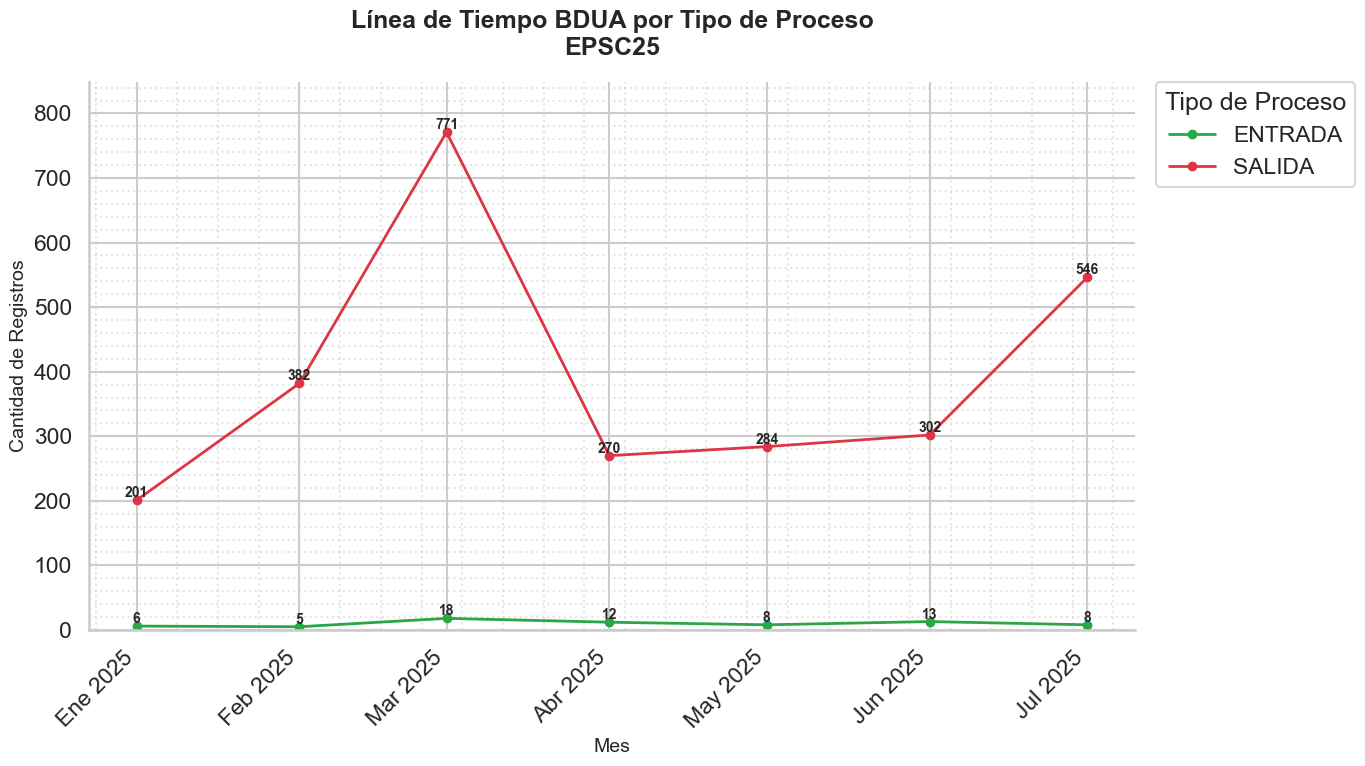

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# (El código de preparación de datos es el mismo...)
df_Estadisticas['FECHA_PROCESO'] = pd.to_datetime(df_Estadisticas['FECHA_PROCESO'], errors='coerce')
df_Estadisticas['Mes_Año'] = df_Estadisticas['FECHA_PROCESO'].dt.to_period('M')
totales_por_mes = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().reset_index(name='Total')
timeline = totales_por_mes.pivot(index='Mes_Año', columns='PROCESO', values='Total').fillna(0)

# Mapeo abreviado de meses en español
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

# Estilo y paleta
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Diccionario para estandarizar los colores de Ingresos (ENTRADA) y Salidas (SALIDA)
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}

idx = timeline.index.to_timestamp()
fig, ax = plt.subplots(figsize=(14, 8))

# Plotear cada línea con los nuevos colores
for column in timeline.columns:
    y = timeline[column].values
    color = colores_proceso.get(column, 'gray') 
    
    ax.plot(idx, y, marker='o', linewidth=2, label=column, color=color, markersize=6)
    
    for x, val in zip(idx, y):
        if val > 0:
            ax.text(x, val, f"{int(val)}", va='bottom', ha='center', fontsize=10, fontweight='bold')

# Formato de eje X
ax.set_xticks(idx)
ax.set_xticklabels([f"{spanish_abbr[d.month]} {d.year}" for d in idx], rotation=45, ha='right')
# (Resto del código de la gráfica es el mismo...)
sns.despine(ax=ax)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)
ax.set_title(f'Línea de Tiempo BDUA por Tipo de Proceso\n{Regimen}', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('Cantidad de Registros', fontsize=14)
ax.legend(title='Tipo de Proceso', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
y_max = timeline.values.max()
ax.set_ylim(0, y_max * 1.1)

# Crear la carpeta si no existe
os.makedirs(R_Salida_IMG, exist_ok=True)
# Guardar la imagen
nombre_archivo = f"Línea de Tiempo BDUA por Tipo de Proceso BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout()
plt.show()

## 7.2. Gráfico de Barras Apiladas por Tipo de Archivo

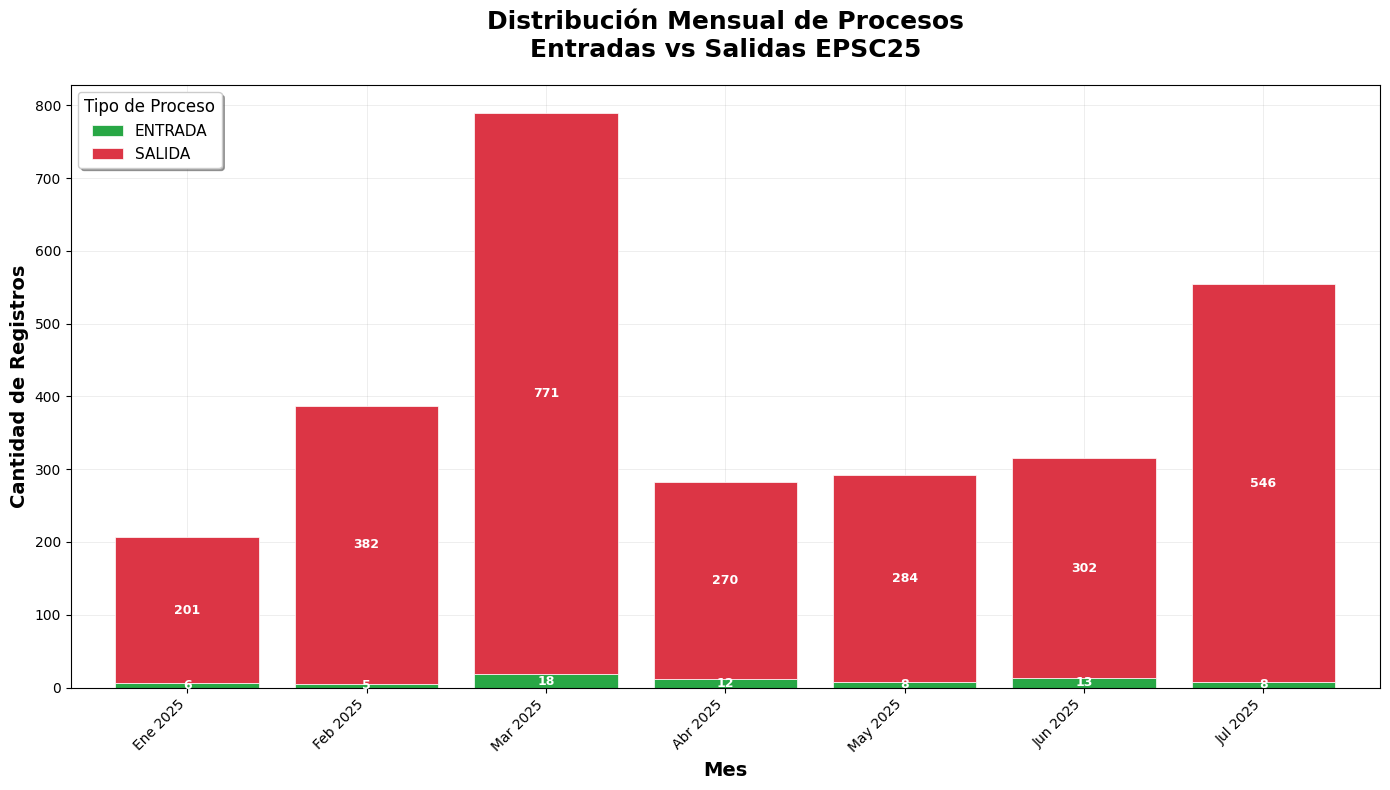

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Diccionario para estandarizar los colores de Ingresos (ENTRADA) y Salidas (SALIDA)
colores_proceso = {
    'ENTRADA': '#28a745',
    'SALIDA': '#dc3545'
}

# (El código de preparación de datos es el mismo...)
df_Estadisticas['Mes_Año'] = df_Estadisticas['FECHA_PROCESO'].dt.to_period('M')
timeline_proceso = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)

# Mapeo de meses en español
spanish_abbr = {1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'}

plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))

# Crear el gráfico de barras apiladas usando los nuevos colores
colores_para_plot = [colores_proceso.get(col, 'gray') for col in timeline_proceso.columns]
timeline_proceso.plot(kind='bar', stacked=True, ax=ax, 
                      color=colores_para_plot, 
                      width=0.8, edgecolor='white', linewidth=0.5)

# (Resto del código de la gráfica es el mismo...)
labels = [f"{spanish_abbr[period.month]} {period.year}" for period in timeline_proceso.index]
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_title(f'Distribución Mensual de Procesos\nEntradas vs Salidas {Regimen}', 
              fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Mes', fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de Registros', fontsize=14, fontweight='bold')
ax.legend(title='Tipo de Proceso', loc='upper left', frameon=True, 
          fancybox=True, shadow=True, title_fontsize=12, fontsize=11)

for i, (idx, row) in enumerate(timeline_proceso.iterrows()):
    entrada = row.get('ENTRADA', 0)
    salida = row.get('SALIDA', 0)
    if entrada > 0:
        ax.text(i, entrada/2, f'{int(entrada)}', ha='center', va='center', fontweight='bold', color='white', fontsize=9)
    if salida > 0:
        ax.text(i, entrada + salida/2, f'{int(salida)}', ha='center', va='center', fontweight='bold', color='white', fontsize=9)

ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Guardar la imagen
nombre_archivo = f"Distribución Mensual Procesos BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout()
plt.show()

## 7.3. Heatmap de Tipos de Archivo por Mes registros de SALIDA

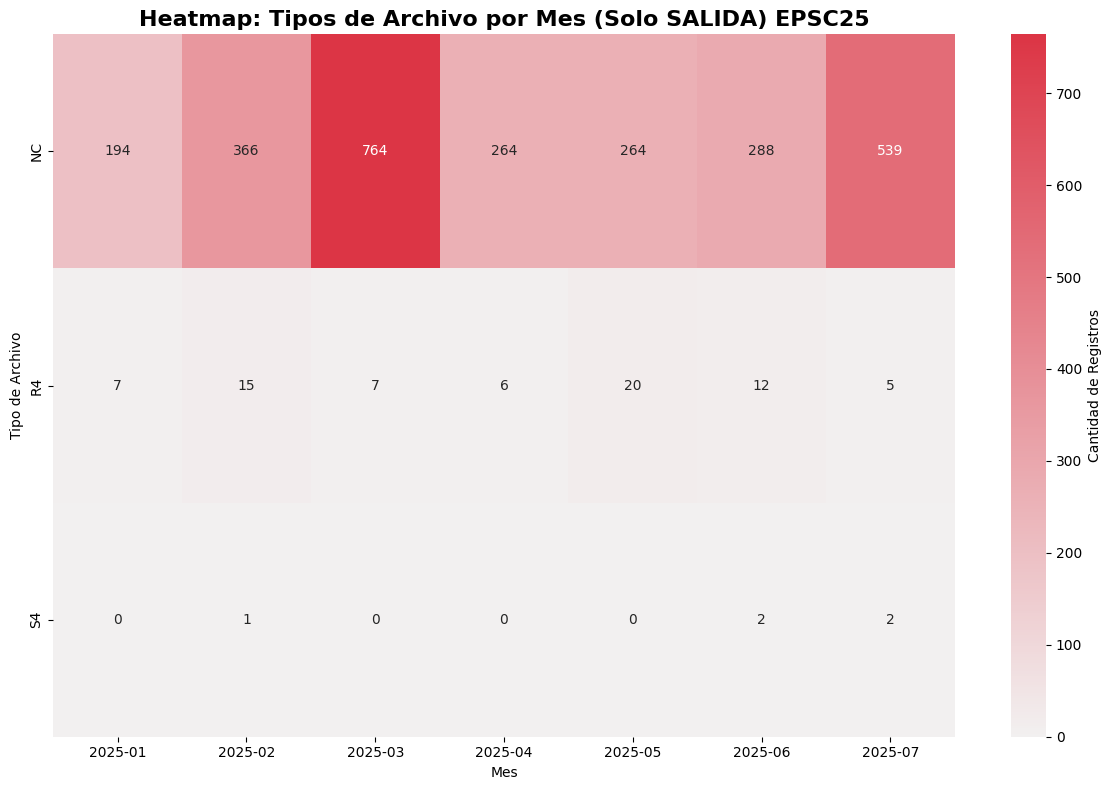

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (El código de preparación de datos y los diccionarios de colores se mantienen de la respuesta anterior)
# --- ESTANDARIZACIÓN DE COLORES CON PALETA SUAVE ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}

colores_archivos = {
    'NC': '#007bff',   # Azul pastel
    'MC': '#fd7e14',   # Naranja suave
    'R1': '#20c997',   # Turquesa
    'S4': '#e83e8c',   # Rosa
    'R4': '#6f42c1',   # Morado oscuro
    'R5': '#6c757d'    # Gris oscuro
}

# Filtrar solo los registros de SALIDA
df_salida = df_Estadisticas[df_Estadisticas['PROCESO'] == 'SALIDA']

# Agrupar por mes y tipo de archivo para el heatmap
pivot_heatmap_salida = df_salida.groupby(['Mes_Año', 'Tipo_Archivo']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

# Crear un mapa de colores personalizado a partir del color estandarizado de SALIDA
cmap_salida = sns.light_palette(colores_proceso['SALIDA'], as_cmap=True)

sns.heatmap(pivot_heatmap_salida.T, annot=True, fmt='d', cmap=cmap_salida, 
            cbar_kws={'label': 'Cantidad de Registros'})

plt.title(f'Heatmap: Tipos de Archivo por Mes (Solo SALIDA) {Regimen}', fontsize=16, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Tipo de Archivo')

# Guardar la imagen
nombre_archivo = f"Heatmap SALIDA por Mes BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')


plt.tight_layout()
plt.show()

## 7.4. Heatmap de Tipos de Archivo por Mes registros de ENTRADA

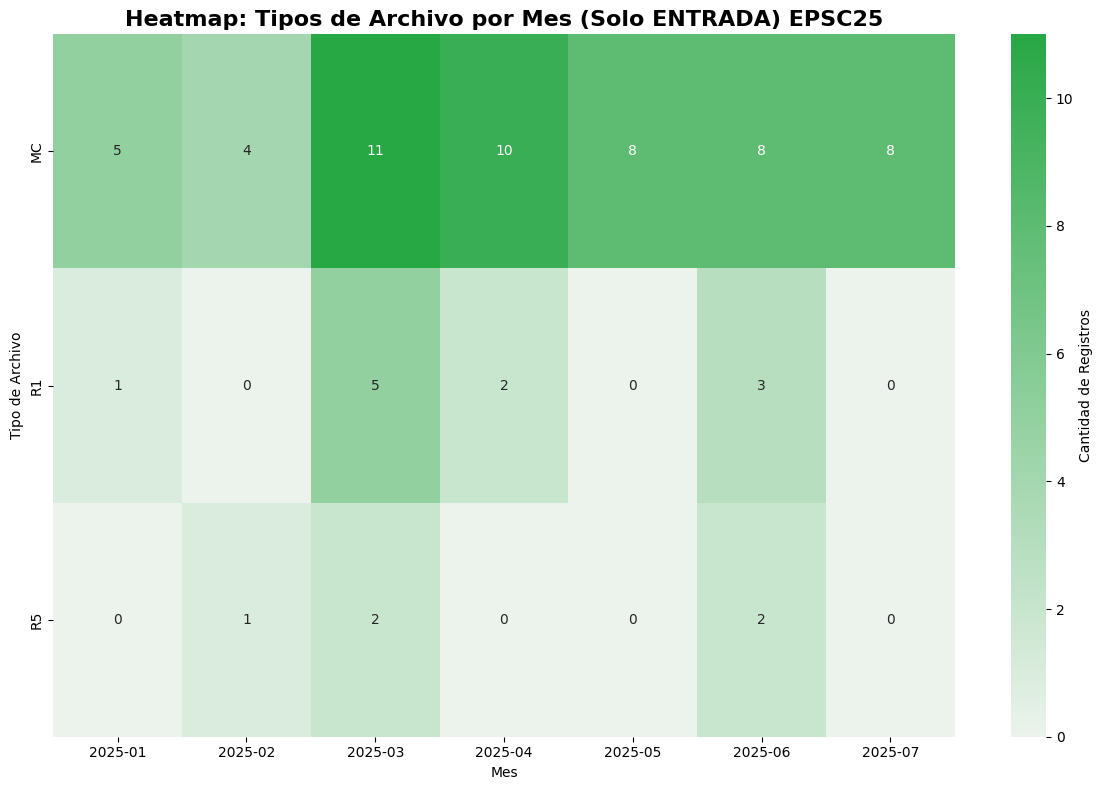

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (Los diccionarios de colores se mantienen de la respuesta anterior)
# --- ESTANDARIZACIÓN DE COLORES CON PALETA SUAVE ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}

colores_archivos = {
    'NC': '#007bff',   # Azul pastel
    'MC': '#fd7e14',   # Naranja suave
    'R1': '#20c997',   # Turquesa
    'S4': '#e83e8c',   # Rosa
    'R4': '#6f42c1',   # Morado oscuro
    'R5': '#6c757d'    # Gris oscuro
}

# Filtrar solo los registros de ENTRADA
df_entrada = df_Estadisticas[df_Estadisticas['PROCESO'] == 'ENTRADA']

# Heatmap mostrando la intensidad de cada tipo de archivo por mes (solo ENTRADA)
pivot_heatmap_entrada = df_entrada.groupby(['Mes_Año', 'Tipo_Archivo']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

# Crear un mapa de colores personalizado a partir del color estandarizado de ENTRADA
cmap_entrada = sns.light_palette(colores_proceso['ENTRADA'], as_cmap=True)

sns.heatmap(pivot_heatmap_entrada.T, annot=True, fmt='d', cmap=cmap_entrada, 
            cbar_kws={'label': 'Cantidad de Registros'})

plt.title(f'Heatmap: Tipos de Archivo por Mes (Solo ENTRADA) {Regimen}', fontsize=16, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Tipo de Archivo')

# Guardar la imagen
nombre_archivo = f"Heatmap ENTRADA por Mes BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout()
plt.show()

## 7.5. Análisis de Balance Operativo: Entradas vs Salidas

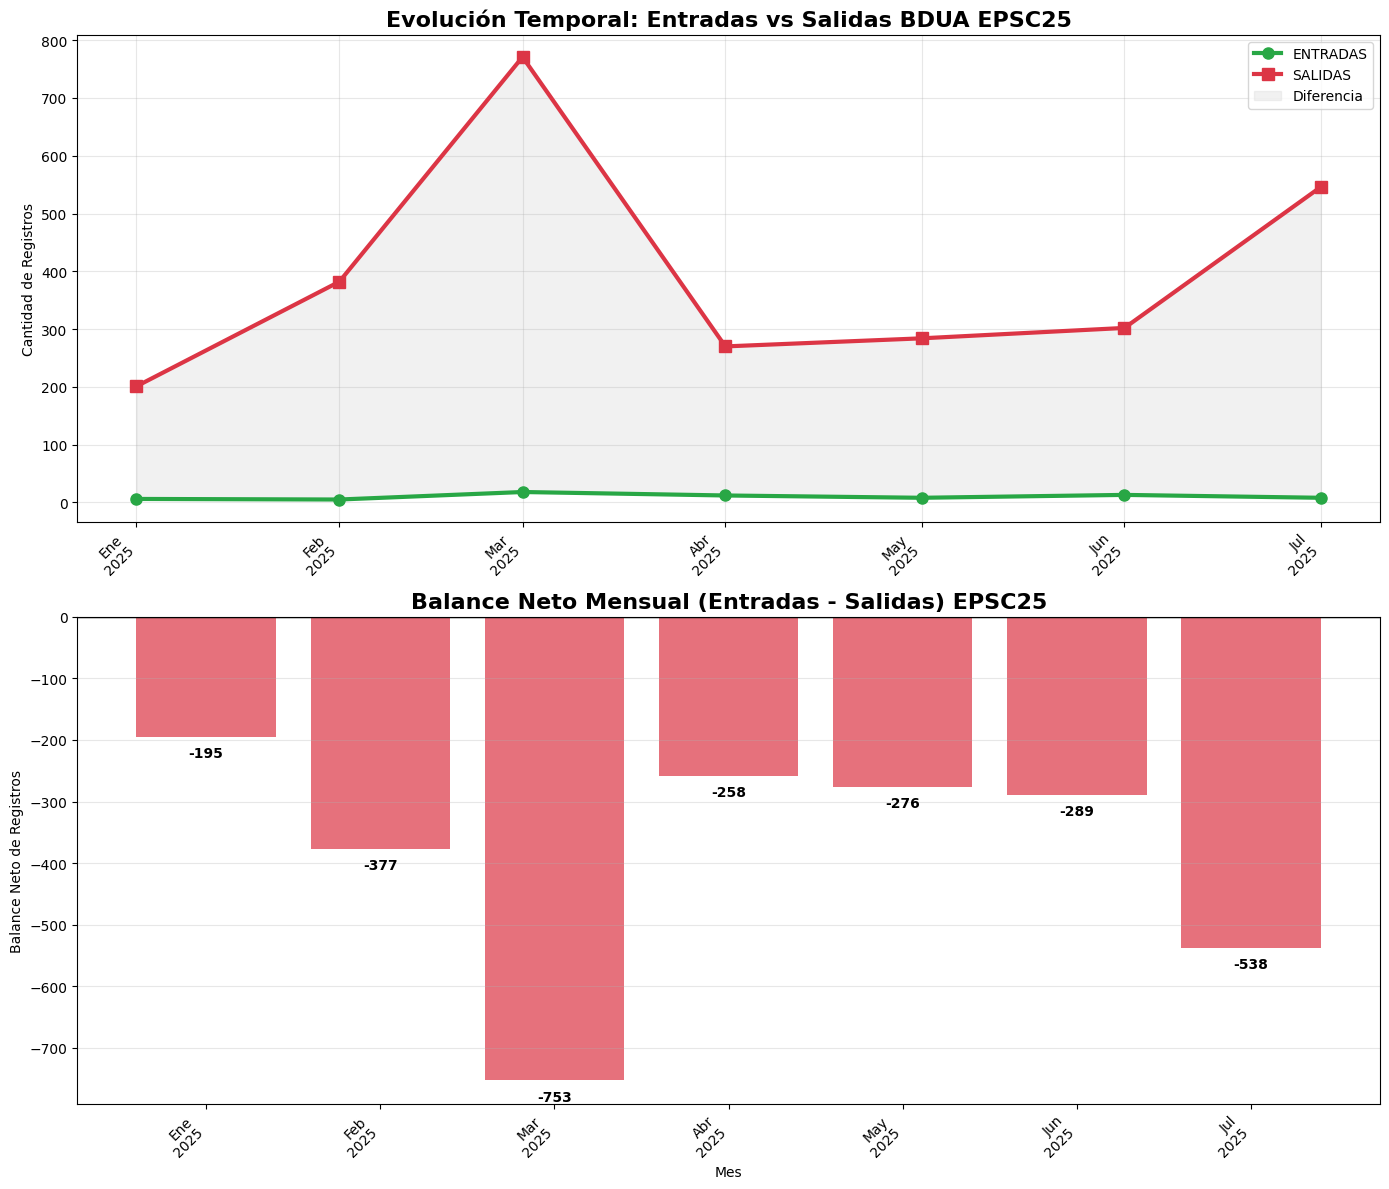

=== ANÁLISIS DE BALANCE OPERATIVO ===
Promedio mensual de entradas: 10.0
Promedio mensual de salidas: 393.7
Balance neto promedio: -383.7
Meses con balance positivo: 0
Meses con balance negativo: 7


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# (Se asume que los diccionarios de colores y las abreviaciones de meses ya están definidos)
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}

spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

# Calcular el balance mensual (Entradas - Salidas)
balance_mensual = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
balance_mensual['BALANCE'] = balance_mensual.get('ENTRADA', 0) - balance_mensual.get('SALIDA', 0)
balance_mensual['TOTAL_MOVIMIENTOS'] = balance_mensual.get('ENTRADA', 0) + balance_mensual.get('SALIDA', 0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Gráfico 1: Entradas vs Salidas con líneas
idx = balance_mensual.index.to_timestamp()

if 'ENTRADA' in balance_mensual.columns:
    ax1.plot(idx, balance_mensual['ENTRADA'], marker='o', linewidth=3, 
             label='ENTRADAS', color=colores_proceso['ENTRADA'], markersize=8)
    
if 'SALIDA' in balance_mensual.columns:
    ax1.plot(idx, balance_mensual['SALIDA'], marker='s', linewidth=3, 
             label='SALIDAS', color=colores_proceso['SALIDA'], markersize=8)

# Área entre las líneas
if 'ENTRADA' in balance_mensual.columns and 'SALIDA' in balance_mensual.columns:
    ax1.fill_between(idx, balance_mensual['ENTRADA'], balance_mensual['SALIDA'], 
                     alpha=0.3, color='lightgray', label='Diferencia') # Cambiado a gris para neutralidad

ax1.set_title(f'Evolución Temporal: Entradas vs Salidas BDUA {Regimen}', fontsize=16, fontweight='bold')
ax1.set_ylabel('Cantidad de Registros')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Etiquetas en español
labels = [f"{spanish_abbr[period.month]}\n{period.year}" for period in balance_mensual.index.to_timestamp()]
ax1.set_xticks(idx)
ax1.set_xticklabels(labels, rotation=45, ha='right')

# Gráfico 2: Balance neto
colors = [colores_proceso['ENTRADA'] if x >= 0 else colores_proceso['SALIDA'] for x in balance_mensual['BALANCE']]
bars = ax2.bar(range(len(balance_mensual)), balance_mensual['BALANCE'], color=colors, alpha=0.7)

# Línea de referencia en cero
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Etiquetas en las barras
for i, (bar, value) in enumerate(zip(bars, balance_mensual['BALANCE'])):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (5 if height >= 0 else -15),
             f'{int(value)}', ha='center', va='bottom' if height >= 0 else 'top', 
             fontweight='bold', fontsize=10)

ax2.set_title(f'Balance Neto Mensual (Entradas - Salidas) {Regimen}', fontsize=16, fontweight='bold')
ax2.set_ylabel('Balance Neto de Registros')
ax2.set_xlabel('Mes')

ax2.set_xticks(range(len(balance_mensual)))
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Guardar la imagen
nombre_archivo = f"BN & LT por Mes BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout()
plt.show()

# Métricas adicionales
print("=== ANÁLISIS DE BALANCE OPERATIVO ===")
print(f"Promedio mensual de entradas: {balance_mensual.get('ENTRADA', pd.Series([0])).mean():.1f}")
print(f"Promedio mensual de salidas: {balance_mensual.get('SALIDA', pd.Series([0])).mean():.1f}")
print(f"Balance neto promedio: {balance_mensual['BALANCE'].mean():.1f}")
print(f"Meses con balance positivo: {(balance_mensual['BALANCE'] > 0).sum()}")
print(f"Meses con balance negativo: {(balance_mensual['BALANCE'] < 0).sum()}")

## 7.6. Dashboard de Balance Entradas y salidas 

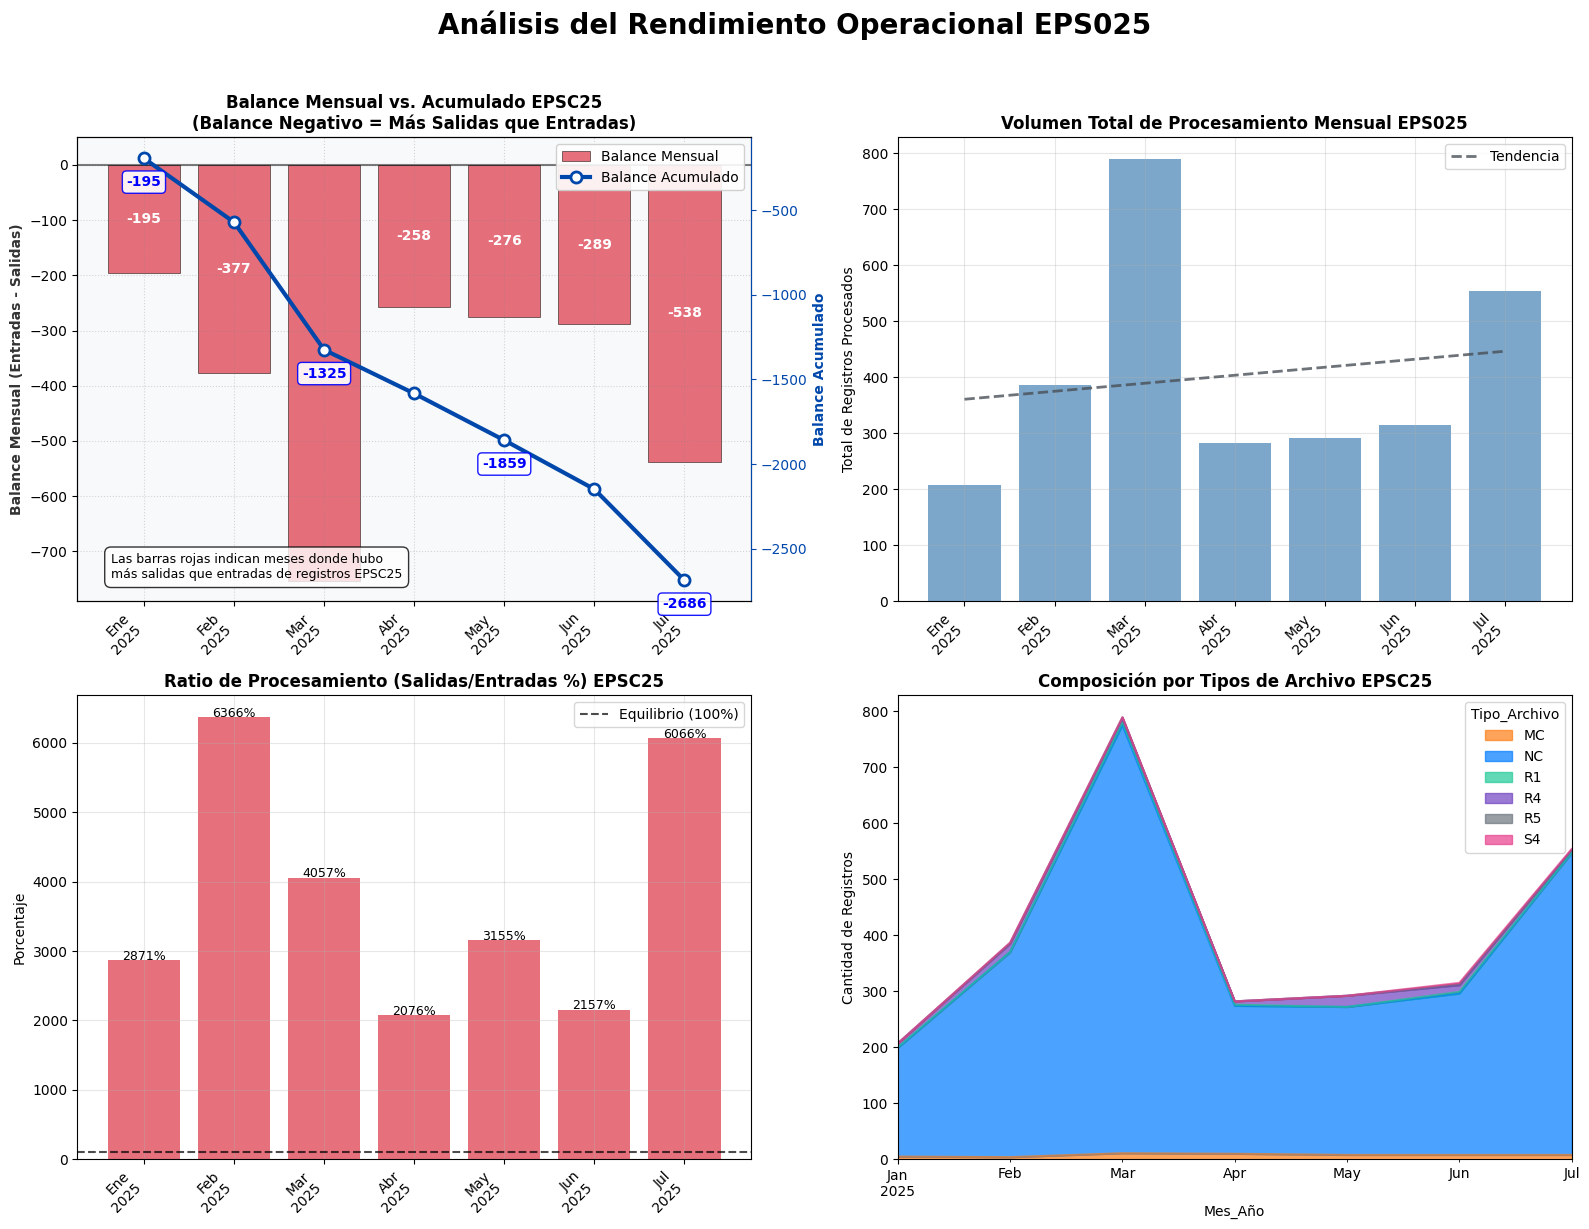


=== MÉTRICAS CLAVE DEL FLUJO BDUA ===
Total entradas acumuladas: 70
Total salidas acumuladas: 2756
Balance neto acumulado: -2686
Promedio mensual de procesamiento: 403 registros


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- ESTANDARIZACIÓN DE COLORES CON PALETA SUAVE ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}

colores_archivos = {
    'NC': '#007bff',   # Azul pastel
    'MC': '#fd7e14',   # Naranja suave
    'R1': '#20c997',   # Turquesa
    'S4': '#e83e8c',   # Rosa
    'R4': '#6f42c1',   # Morado oscuro
    'R5': '#6c757d'    # Gris oscuro
}

spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

# (El código de preparación de datos se mantiene...)
balance_mensual = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
balance_mensual['BALANCE'] = balance_mensual.get('ENTRADA', 0) - balance_mensual.get('SALIDA', 0)
balance_mensual['TOTAL_MOVIMIENTOS'] = balance_mensual.get('ENTRADA', 0) + balance_mensual.get('SALIDA', 0)

# --- CREACIÓN DE LA FIGURA Y TÍTULO PRINCIPAL ---
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
plt.tight_layout(pad=4.0) # Aumento el pad para más espacio

fig.suptitle('Análisis del Rendimiento Operacional EPS025', 
             fontsize=20, 
             fontweight='bold', 
             y=1.02, # Posición vertical del título
             ha='center') # Alineación horizontal
# -----------------------------------------------

# 1. GRÁFICO MEJORADO: KPI con balance mensual vs acumulado
balance_mensual_neto = balance_mensual['ENTRADA'] - balance_mensual['SALIDA']
balance_acumulado = balance_mensual_neto.cumsum()

ax1.set_facecolor('#f8f9fa')
ax1.grid(True, alpha=0.3, color='gray', linestyle=':')

# Usar barras para balance mensual con los colores estandarizados
bars = ax1.bar(range(len(balance_mensual)), balance_mensual_neto, 
    color=[colores_proceso['ENTRADA'] if x >= 0 else colores_proceso['SALIDA'] for x in balance_mensual_neto], 
    alpha=0.7, label='Balance Mensual', edgecolor='black', linewidth=0.5)

ax1_twin = ax1.twinx()
ax1_twin.plot(range(len(balance_acumulado)), balance_acumulado, 'o-', 
             color='#0047AB', linewidth=3, markersize=8, 
             markerfacecolor='white', markeredgewidth=2, 
             label='Balance Acumulado')

for i, value in enumerate(balance_mensual_neto):
    y_pos = value/2 if abs(value) > 30 else (10 if value >= 0 else -25)
    
    if abs(value) > 50:
        text_color = 'white' if value < 0 else 'black'
        ax1.annotate(f"{int(value)}", xy=(i, y_pos), ha='center', 
                     va='center', color=text_color, fontweight='bold', fontsize=10)
    else:
        ax1.annotate(f"{int(value)}", xy=(i, value), 
                     xytext=(0, 5 if value >= 0 else -15), textcoords='offset points',
                     ha='center', fontsize=10, fontweight='bold',
                     color='black', bbox=dict(boxstyle='round,pad=0.2', 
                                              fc='white', alpha=0.8))

for i, acum in enumerate(balance_acumulado):
    if i % 2 == 0 or i == len(balance_acumulado) - 1:
        ax1_twin.annotate(f"{int(acum)}", xy=(i, acum),
                         xytext=(0, -20), textcoords='offset points',
                         ha='center', fontsize=10, fontweight='bold',
                         color='blue', bbox=dict(boxstyle='round,pad=0.3', 
                                                 fc='white', ec='blue', alpha=0.9))

ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
          frameon=True, facecolor='white', framealpha=0.9)

ax1.set_title(f'Balance Mensual vs. Acumulado {Regimen}\n(Balance Negativo = Más Salidas que Entradas)', 
              fontweight='bold', fontsize=12)
ax1.set_xticks(range(len(balance_mensual)))
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.set_ylabel('Balance Mensual (Entradas - Salidas)', fontweight='bold', color='#333333')
ax1_twin.set_ylabel('Balance Acumulado', color='#0047AB', fontweight='bold')
ax1_twin.tick_params(axis='y', colors='#0047AB')
ax1_twin.spines['right'].set_color('#0047AB')

y1_min, y1_max = ax1.get_ylim()
ax1.set_ylim(min(y1_min, -220), max(y1_max, 50))

ax1.annotate(f'Las barras rojas indican meses donde hubo\nmás salidas que entradas de registros {Regimen}', 
             xy=(0.05, 0.05), xycoords='axes fraction', 
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
             fontsize=9)

# 2. Velocidad de procesamiento
ax2.bar(range(len(balance_mensual)), balance_mensual['TOTAL_MOVIMIENTOS'], 
        color='steelblue', alpha=0.7)

z = np.polyfit(range(len(balance_mensual)), balance_mensual['TOTAL_MOVIMIENTOS'], 1)
p = np.poly1d(z)
ax2.plot(range(len(balance_mensual)), p(range(len(balance_mensual))), 
          color='#495057', linestyle='--', alpha=0.8, linewidth=2, label='Tendencia')

ax2.set_title('Volumen Total de Procesamiento Mensual EPS025', fontweight='bold', fontsize=12)
ax2.set_ylabel('Total de Registros Procesados')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Eficiencia relativa
eficiencia = (balance_mensual.get('SALIDA', 0) / 
              (balance_mensual.get('ENTRADA', 0) + 1)) * 100

colors_ef = [colores_proceso['ENTRADA'] if x <= 100 else '#FF9800' if x <= 150 else colores_proceso['SALIDA'] for x in eficiencia]
bars = ax3.bar(range(len(balance_mensual)), eficiencia, color=colors_ef, alpha=0.7)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(eficiencia.iloc[i])}%', ha='center', fontsize=9)

ax3.axhline(y=100, color='black', linestyle='--', alpha=0.7, label='Equilibrio (100%)')
ax3.set_title(f'Ratio de Procesamiento (Salidas/Entradas %) {Regimen}', fontweight='bold', fontsize=12)
ax3.set_ylabel('Porcentaje')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Tipos de archivo más procesados por período
top_tipos = df_Estadisticas['Tipo_Archivo'].value_counts().head(6)
tipos_timeline = df_Estadisticas[df_Estadisticas['Tipo_Archivo'].isin(top_tipos.index)]
tipos_monthly = tipos_timeline.groupby(['Mes_Año', 'Tipo_Archivo']).size().unstack(fill_value=0)

tipos_monthly.plot(kind='area', ax=ax4, alpha=0.7, stacked=True, 
                   color=[colores_archivos.get(c, 'gray') for c in tipos_monthly.columns])
ax4.set_title(f'Composición por Tipos de Archivo {Regimen}', fontweight='bold', fontsize=12)
ax4.set_ylabel('Cantidad de Registros')

labels = [f"{spanish_abbr[period.month]}\n{period.year}" for period in balance_mensual.index.to_timestamp()]
for ax in [ax1, ax2, ax3]:
    ax.set_xticks(range(len(balance_mensual)))
    ax.set_xticklabels(labels, rotation=45, ha='right')

# Guardar la imagen
nombre_archivo = f"Análisis del Rendimiento Operacional BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout()
plt.show()

if 'flujo_acum' not in locals():
    flujo_acum = balance_mensual[['ENTRADA', 'SALIDA']].cumsum()

print("\n=== MÉTRICAS CLAVE DEL FLUJO BDUA ===")
print(f"Total entradas acumuladas: {int(flujo_acum['ENTRADA'].iloc[-1])}")
print(f"Total salidas acumuladas: {int(flujo_acum['SALIDA'].iloc[-1])}")
print(f"Balance neto acumulado: {int(balance_acumulado.iloc[-1])}")
print(f"Promedio mensual de procesamiento: {int(balance_mensual['TOTAL_MOVIMIENTOS'].mean())} registros")

## 7.7. Análisis Avanzado de Balance Neto Acumulado BDUA

e:\Proyectos Python\capresoca-data-automation\venv\Lib\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
e:\Proyectos Python\capresoca-data-automation\venv\Lib\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


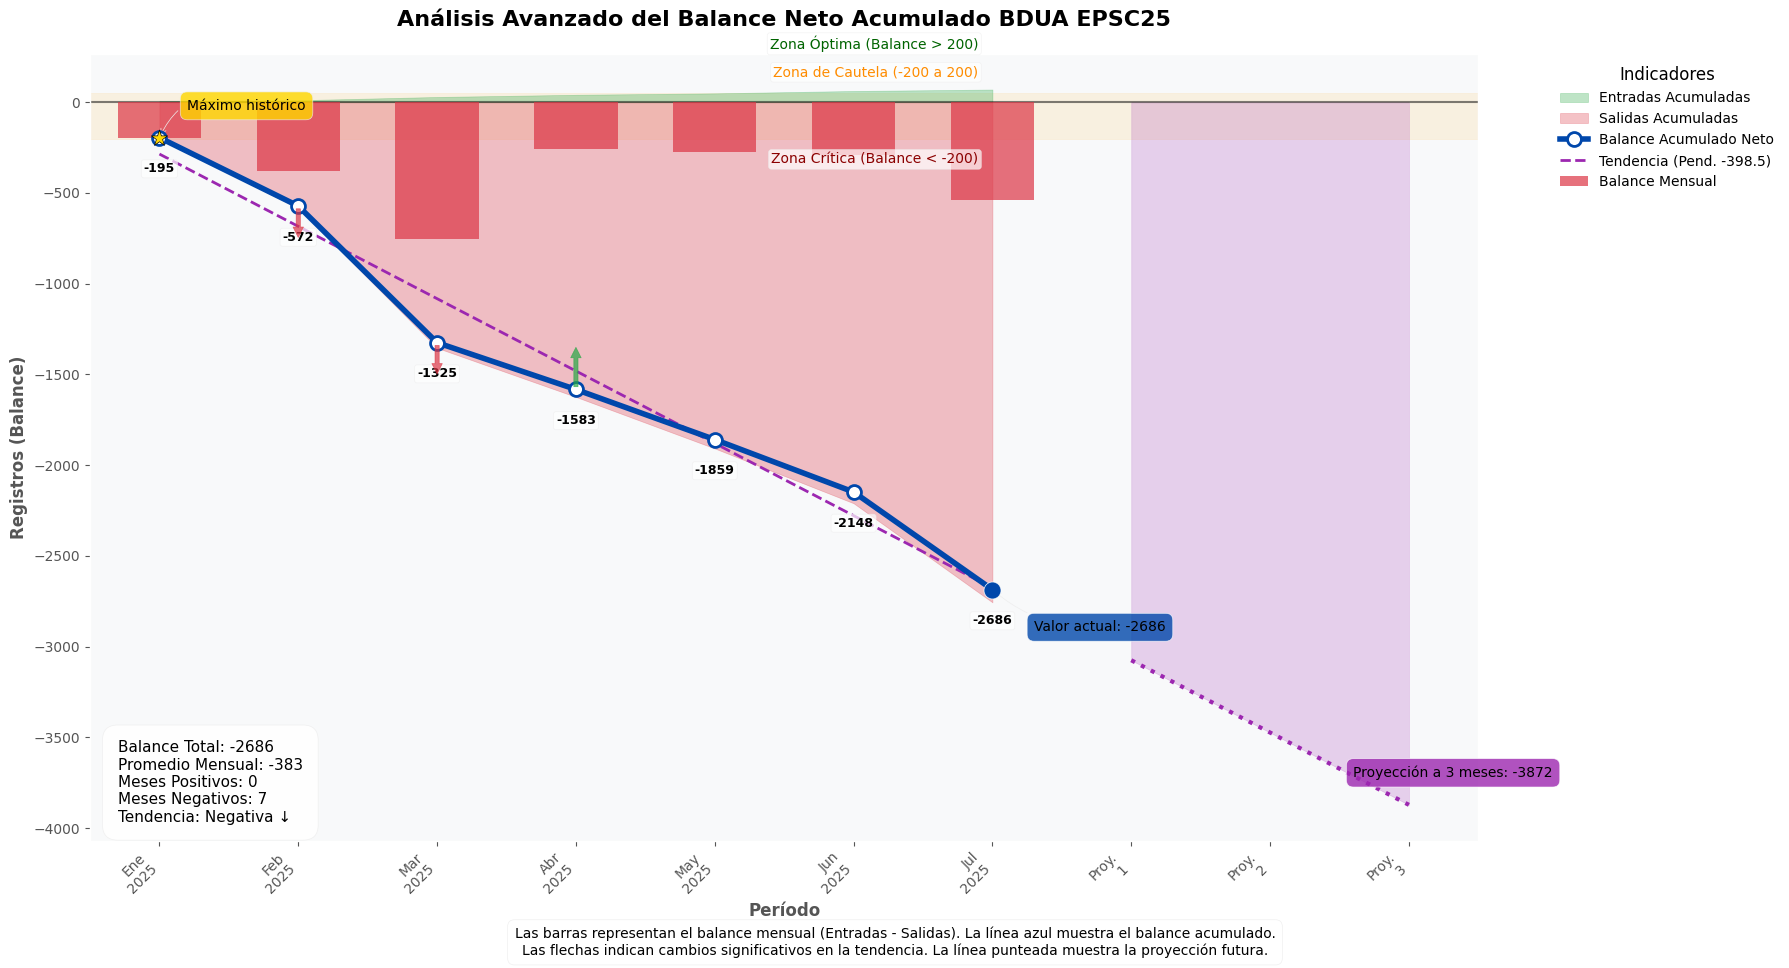

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}

spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']

# --- Datos para el análisis ---
# Asumiendo que las variables balance_mensual, balance_mensual_neto, etc. ya están definidas
if 'df_Estadisticas' in locals():
    # Asume que ya tienes df_Estadisticas cargado, por lo que estas líneas deberían funcionar
    df_Estadisticas['FECHA_PROCESO'] = pd.to_datetime(df_Estadisticas['FECHA_PROCESO'], errors='coerce')
    df_Estadisticas['Mes_Año'] = df_Estadisticas['FECHA_PROCESO'].dt.to_period('M')
    balance_mensual = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
    balance_mensual_neto = balance_mensual.get('ENTRADA', 0) - balance_mensual.get('SALIDA', 0)
    balance_acumulado = balance_mensual_neto.cumsum()
    flujo_acum = balance_mensual.cumsum()


plt.figure(figsize=(18, 10))

plt.style.use('ggplot')
ax = plt.gca()
ax.set_facecolor('#f8f9fa')
plt.grid(True, alpha=0.3, color='gray', linestyle=':')

# SECCIÓN 1: ÁREA ACUMULADA CON DESCOMPOSICIÓN
x = np.arange(len(balance_mensual))
entradas_acum = flujo_acum['ENTRADA'].values
salidas_acum = flujo_acum['SALIDA'].values

plt.fill_between(x, 0, entradas_acum, alpha=0.3, color=colores_proceso['ENTRADA'], label='Entradas Acumuladas')
plt.fill_between(x, 0, -salidas_acum, alpha=0.3, color=colores_proceso['SALIDA'], label='Salidas Acumuladas')

# SECCIÓN 2: LÍNEAS DE BALANCE NETO Y ACUMULADO
bars = plt.bar(x, balance_mensual_neto, 
               color=[colores_proceso['ENTRADA'] if val >= 0 else colores_proceso['SALIDA'] for val in balance_mensual_neto], 
               alpha=0.7, width=0.6, label='Balance Mensual', zorder=3)

plt.plot(x, balance_acumulado, 'o-', color='#0047AB', linewidth=4, 
         markersize=10, markerfacecolor='white', markeredgewidth=2,
         label='Balance Acumulado Neto', zorder=4)

# SECCIÓN 3: ANÁLISIS DE TENDENCIA Y PROYECCIÓN
z = np.polyfit(x, balance_acumulado, 1)
p = np.poly1d(z)
tendency = p(x)
future_x = np.arange(len(x), len(x) + 3)
future_tendency = p(future_x)

plt.plot(x, tendency, '--', color='#9C27B0', linewidth=2, 
         label=f'Tendencia (Pend. {z[0]:.1f})', zorder=2)
plt.plot(future_x, future_tendency, ':', color='#9C27B0', linewidth=3, zorder=2)
plt.fill_between(future_x, future_tendency, alpha=0.2, color='#9C27B0')

# SECCIÓN 4: TASAS DE CAMBIO Y VELOCIDAD
delta_absoluto = balance_acumulado.diff().fillna(0)
delta_porcentual = delta_absoluto / balance_acumulado.shift(1).abs() * 100

for i in range(1, len(balance_acumulado)-1):
    aceleracion = delta_absoluto.iloc[i] - delta_absoluto.iloc[i-1]
    
    if abs(aceleracion) > np.mean(np.abs(delta_absoluto)):
        color = colores_proceso['ENTRADA'] if aceleracion > 0 else colores_proceso['SALIDA']
        arrow = FancyArrowPatch(
            (i, balance_acumulado.iloc[i]),
            (i, balance_acumulado.iloc[i] + aceleracion/2),
            mutation_scale=15, color=color, alpha=0.7, zorder=5
        )
        ax.add_patch(arrow)

# SECCIÓN 5: ANOTACIONES Y CONTEXTO
for i, acum in enumerate(balance_acumulado):
    plt.annotate(f"{int(acum)}", 
                 xy=(i, acum),
                 xytext=(0, 10 if acum >= 0 else -25), 
                 textcoords='offset points',
                 ha='center', fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))
    
    if (i > 0 and i < len(balance_acumulado)-1 and 
        ((acum > balance_acumulado.iloc[i-1] and acum > balance_acumulado.iloc[i+1]) or
         (acum < balance_acumulado.iloc[i-1] and acum < balance_acumulado.iloc[i+1]))):
        plt.scatter(i, acum, s=120, marker='*', color='gold', edgecolor='black', zorder=6)

max_index = balance_acumulado.argmax()
current_index = len(balance_acumulado) - 1

plt.scatter(max_index, balance_acumulado.iloc[max_index], s=150, marker='*', 
            color='gold', edgecolor='black', zorder=6)
plt.scatter(current_index, balance_acumulado.iloc[current_index], s=150, 
            marker='o', color='#0047AB', edgecolor='white', zorder=6)

plt.annotate('Máximo histórico', 
             xy=(max_index, balance_acumulado.iloc[max_index]),
             xytext=(20, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'),
             bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.8))

plt.annotate(f'Valor actual: {int(balance_acumulado.iloc[-1])}', 
             xy=(current_index, balance_acumulado.iloc[current_index]),
             xytext=(30, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.2'),
             bbox=dict(boxstyle='round,pad=0.5', fc='#0047AB', color='white', alpha=0.8))

# SECCIÓN 6: CONTEXTO Y COMPARATIVAS
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5, zorder=1)

# === ZONAS DE REFERENCIA (CORREGIDAS) ===
# Definir umbrales fijos que tengan sentido para el negocio (ajusta estos valores según sea necesario)
umbral_critico_neg = -200
umbral_cautela_pos = 50
umbral_optimo_pos = 200

# Zonas de color
plt.axhspan(-np.inf, umbral_critico_neg, alpha=0.1, color=colores_proceso['SALIDA'], zorder=0)
plt.axhspan(umbral_critico_neg, umbral_cautela_pos, alpha=0.1, color='orange', zorder=0)
plt.axhspan(umbral_cautela_pos, np.inf, alpha=0.1, color=colores_proceso['ENTRADA'], zorder=0)


# Anotaciones para las zonas
plt.annotate('Zona Crítica (Balance < -200)', xy=(len(balance_mensual) - 1, umbral_critico_neg),
             xytext=(-10, -10), textcoords='offset points', ha='right', va='top',
             fontsize=10, color='darkred', bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))
plt.annotate('Zona de Cautela (-200 a 200)', xy=(len(balance_mensual) - 1, umbral_cautela_pos),
             xytext=(-10, 10), textcoords='offset points', ha='right', va='bottom',
             fontsize=10, color='darkorange', bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))
plt.annotate('Zona Óptima (Balance > 200)', xy=(len(balance_mensual) - 1, umbral_optimo_pos),
             xytext=(-10, 10), textcoords='offset points', ha='right', va='bottom',
             fontsize=10, color='darkgreen', bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))


plt.annotate(f'Proyección a 3 meses: {int(future_tendency[-1])}', 
             xy=(future_x[-1], future_tendency[-1]),
             xytext=(-40, 20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='#9C27B0', color='white', alpha=0.8))


# SECCIÓN 7: ESTADÍSTICAS CLAVE
promedio_balance = balance_mensual_neto.mean()
balance_total = balance_acumulado.iloc[-1]
meses_positivos = (balance_mensual_neto > 0).sum()
meses_negativos = (balance_mensual_neto < 0).sum()

stats_text = (
    f"Balance Total: {int(balance_total)}\n"
    f"Promedio Mensual: {int(promedio_balance)}\n"
    f"Meses Positivos: {meses_positivos}\n"
    f"Meses Negativos: {meses_negativos}\n"
    f"Tendencia: {'Positiva ↑' if z[0] > 0 else 'Negativa ↓'}"
)

plt.annotate(stats_text, xy=(0.02, 0.02), xycoords='axes fraction',
             bbox=dict(boxstyle='round,pad=1', fc='white', alpha=0.9),
             fontsize=11, va='bottom')

# SECCIÓN 8: MEJORAS ESTÉTICAS Y FINALIZACIÓN
plt.title(f'Análisis Avanzado del Balance Neto Acumulado BDUA {Regimen}', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Período', fontsize=12, fontweight='bold')
plt.ylabel('Registros (Balance)', fontsize=12, fontweight='bold')

labels_x = [f"{spanish_abbr[period.month]}\n{period.year}" for period in balance_mensual.index.to_timestamp()]
future_labels = [f"Proy.\n{i+1}" for i in range(len(future_x))]
all_x_ticks = np.concatenate([np.arange(len(balance_mensual)), future_x])
all_labels = labels_x + future_labels
plt.xticks(all_x_ticks, all_labels, rotation=45, ha='right')
plt.xlim(-0.5, len(balance_mensual) + 2.5)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0),
           frameon=False, fontsize=10, title='Indicadores', title_fontsize=12)

plt.figtext(0.5, 0.01, 
            "Las barras representan el balance mensual (Entradas - Salidas). La línea azul muestra el balance acumulado.\n"
            "Las flechas indican cambios significativos en la tendencia. La línea punteada muestra la proyección futura.",
            ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.9))
plt.grid(False)

# Guardar la imagen
nombre_archivo = f"Análisis Avanzado del Balance Neto Acumulado BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## 7.8. Dashboard de Distribuciones

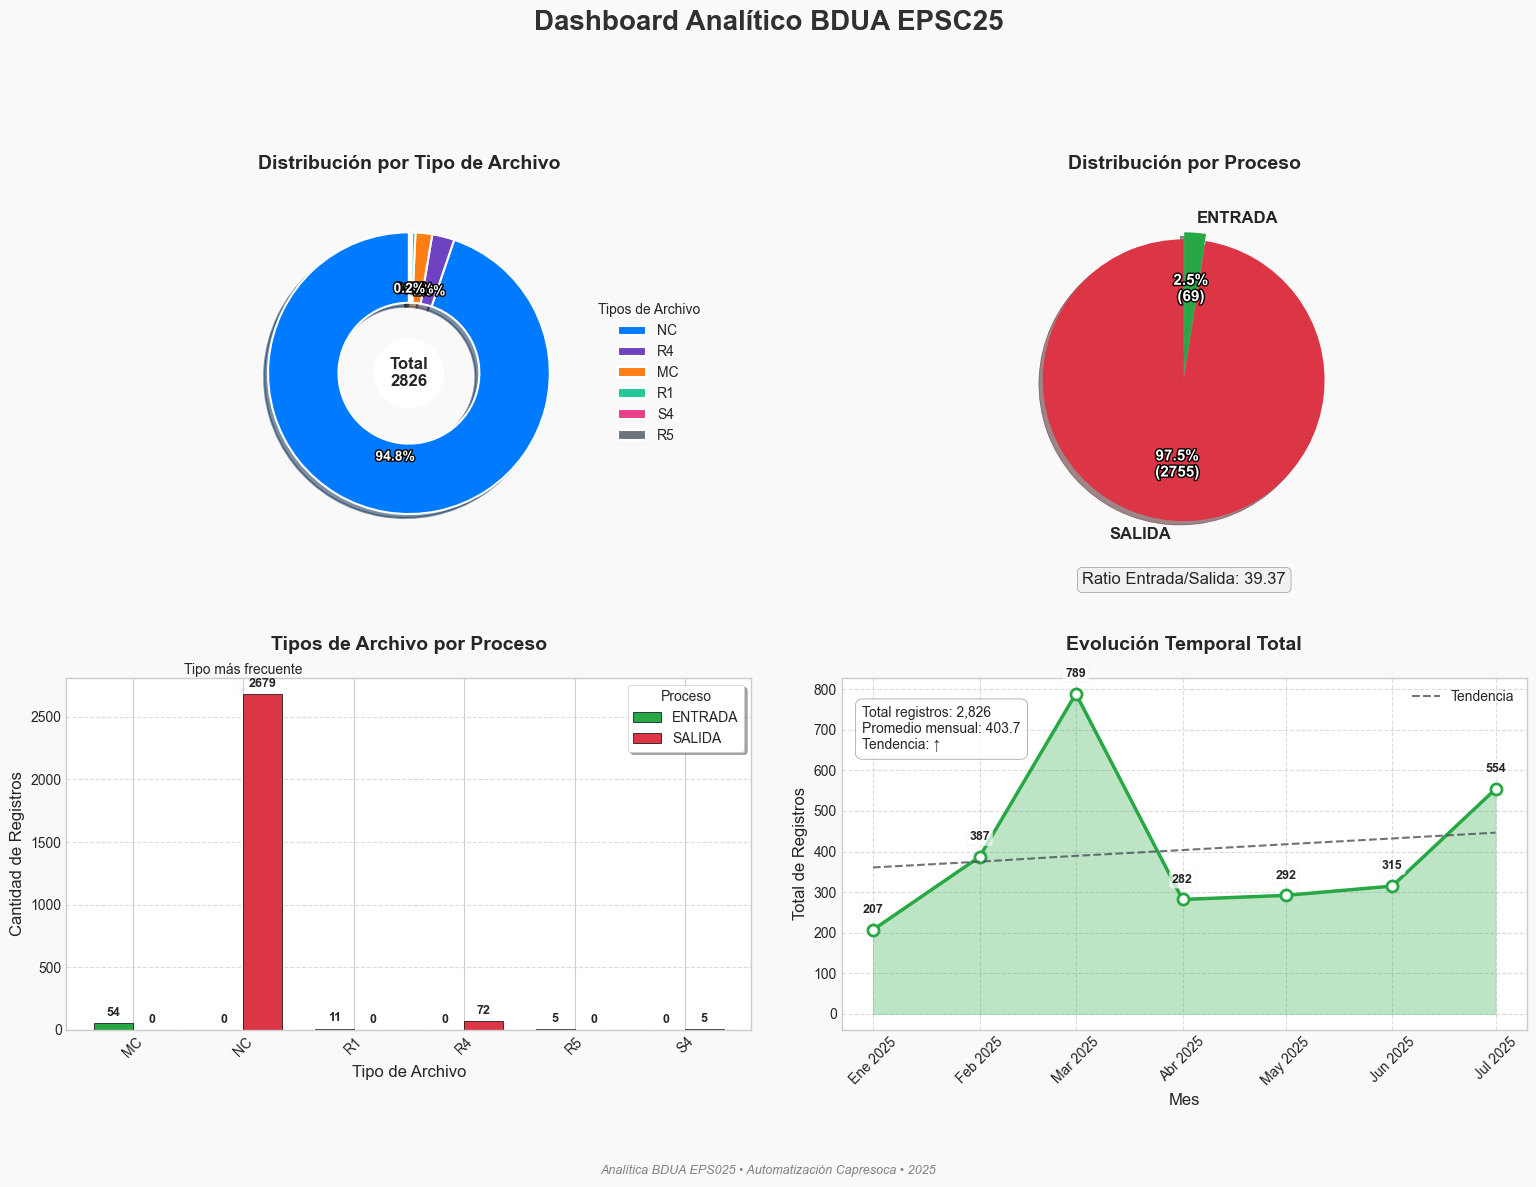

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as patheffects

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
colores_archivos = {
    'NC': '#007bff',   # Azul pastel
    'MC': '#fd7e14',   # Naranja suave
    'R1': '#20c997',   # Turquesa
    'S4': '#e83e8c',   # Rosa
    'R4': '#6f42c1',   # Morado oscuro
    'R5': '#6c757d'    # Gris oscuro
}
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

# Configurar el estilo global
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']

# Crear la figura con un fondo ligeramente coloreado y mayor resolución
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12), dpi=100, 
                                             facecolor='#f9f9f9')
fig.suptitle(f'Dashboard Analítico BDUA {Regimen}', fontsize=20, fontweight='bold', 
             y=0.98, color='#303030')

# 1. Gráfico de torta mejorado para tipos de archivo
tipo_counts = df_Estadisticas['Tipo_Archivo'].value_counts()
# Usar la paleta estandarizada para los tipos de archivo
paleta_archivos = [colores_archivos.get(c, 'gray') for c in tipo_counts.index]
wedges, texts, autotexts = ax1.pie(
    tipo_counts.values, 
    labels=None, 
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.5, 'edgecolor': 'white', 'linewidth': 1.5},
    shadow=True,
    colors=paleta_archivos,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    autotext.set_color('white')
    autotext.set_path_effects([mpl.patheffects.withStroke(linewidth=2, foreground='black')])

ax1.legend(wedges, tipo_counts.index, 
           title="Tipos de Archivo",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=10)

centre_circle = plt.Circle((0,0),0.25,fc='white')
ax1.add_patch(centre_circle)

ax1.set_title('Distribución por Tipo de Archivo', fontsize=14, fontweight='bold', pad=20)
ax1.text(0, 0, f"Total\n{tipo_counts.sum()}", ha='center', va='center', fontsize=12, fontweight='bold')

# 2. Gráfico de torta mejorado para procesos
proceso_counts = df_Estadisticas['PROCESO'].value_counts()
explode = [0.05, 0] 
# Usar el diccionario de colores estandarizados
wedges, texts, autotexts = ax2.pie(
    proceso_counts.values, 
    labels=proceso_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(proceso_counts.values)/100)})',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=[colores_proceso[p] for p in proceso_counts.index],
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
    autotext.set_color('white')
    autotext.set_path_effects([mpl.patheffects.withStroke(linewidth=2, foreground='black')])

ax2.set_title('Distribución por Proceso', fontsize=14, fontweight='bold', pad=20)

ratio_texto = f"Ratio Entrada/Salida: {proceso_counts.iloc[0]/proceso_counts.iloc[1]:.2f}"
ax2.annotate(ratio_texto, xy=(0.5, -0.1), xycoords='axes fraction', 
             ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", 
                                                 fc='#f0f0f0', ec="gray", alpha=0.8))

# 3. Gráfico de barras mejorado
tabla_cruzada = pd.crosstab(df_Estadisticas['Tipo_Archivo'], df_Estadisticas['PROCESO'])
bars = tabla_cruzada.plot(
    kind='bar', 
    ax=ax3, 
    # Usar el diccionario de colores estandarizados
    color=[colores_proceso[c] for c in tabla_cruzada.columns],
    width=0.7,
    edgecolor='black',
    linewidth=0.5
)

for container in bars.containers:
    ax3.bar_label(container, fmt='%d', fontsize=9, fontweight='bold', padding=3)

ax3.set_title('Tipos de Archivo por Proceso', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('Tipo de Archivo', fontsize=12)
ax3.set_ylabel('Cantidad de Registros', fontsize=12)
ax3.tick_params(axis='x', rotation=45, labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(title='Proceso', frameon=True, fancybox=True, shadow=True)

max_tipo = tabla_cruzada.sum(axis=1).idxmax()
max_idx = tabla_cruzada.index.get_loc(max_tipo)
ax3.get_children()[max_idx].set_facecolor('#ffdf80')
ax3.annotate(f'Tipo más frecuente', xy=(max_idx, tabla_cruzada.sum(axis=1).max()), 
             xytext=(0, 15), textcoords='offset points', ha='center',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# 4. Gráfico de línea de tiempo mejorado
timeline_general = df_Estadisticas.groupby('Mes_Año').size()
idx = timeline_general.index.to_timestamp()

# Usar el color estandarizado para la entrada
ax4.fill_between(idx, timeline_general.values, alpha=0.3, color=colores_proceso['ENTRADA'])
ax4.plot(idx, timeline_general.values, color=colores_proceso['ENTRADA'], linewidth=2.5, marker='o', 
         markersize=8, markerfacecolor='white', markeredgecolor=colores_proceso['ENTRADA'], markeredgewidth=2)

for i, v in enumerate(timeline_general.values):
    ax4.annotate(f"{v}", xy=(idx[i], v), xytext=(0, 10),
                 textcoords="offset points", ha='center', va='bottom',
                 fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

z = np.polyfit(range(len(idx)), timeline_general.values, 1)
p = np.poly1d(z)
# Usar un color neutral para la línea de tendencia
ax4.plot(idx, p(range(len(idx))), "--", color='#495057', alpha=0.8, linewidth=1.5, label='Tendencia')

ax4.set_title('Evolución Temporal Total', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Mes', fontsize=12)
ax4.set_ylabel('Total de Registros', fontsize=12)
ax4.tick_params(axis='x', rotation=45, labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
ax4.grid(True, linestyle='--', alpha=0.7)
ax4.legend()

labels = [f"{spanish_abbr[d.month]} {d.year}" for d in idx]
ax4.set_xticks(idx)
ax4.set_xticklabels(labels)

stats_text = (
    f"Total registros: {timeline_general.sum():,}\n"
    f"Promedio mensual: {timeline_general.mean():.1f}\n"
    f"Tendencia: {'↑' if z[0] > 0 else '↓'}" # Cambiado de '↗' a '↑' y '↘' a '↓'
)
ax4.text(0.03, 0.92, stats_text, transform=ax4.transAxes, 
         fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

fig.text(0.5, 0.01, 'Analítica BDUA EPS025 • Automatización Capresoca • 2025', 
         ha='center', color='gray', fontsize=9, style='italic')

# Guardar la imagen
nombre_archivo = f"Dashboard Analítico BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout(pad=3, h_pad=3, w_pad=3, rect=[0, 0.03, 1, 0.95])
plt.show()

## 7.9. Facet Grid por Tipo de Archivo

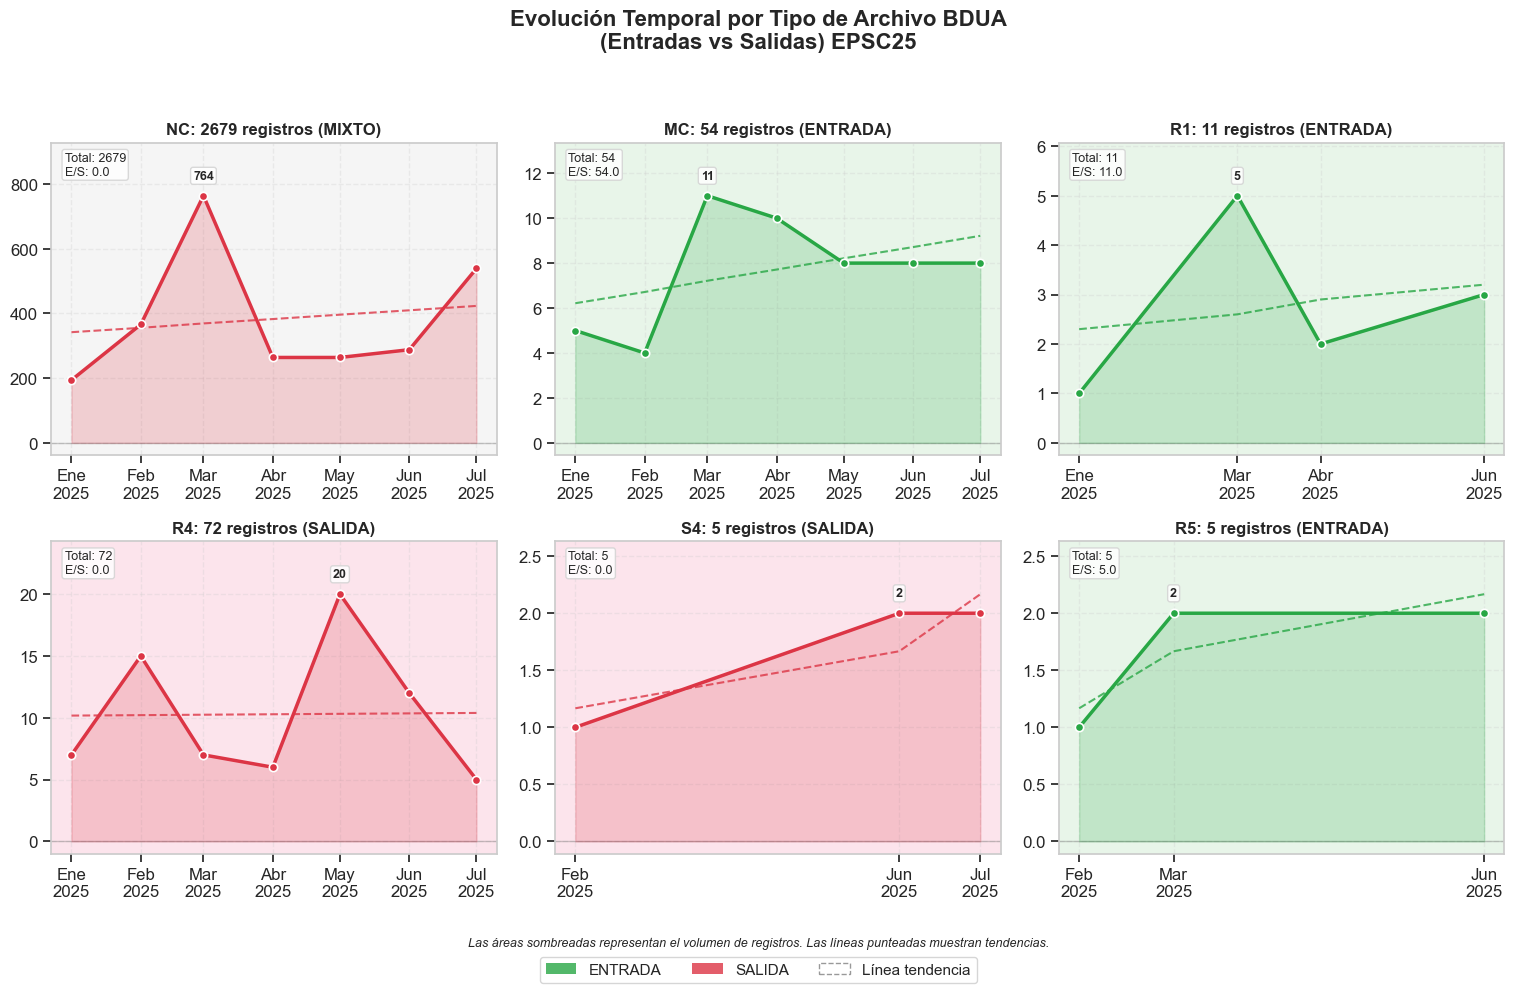

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
colores_archivos = {
    'NC': '#007bff',   # Azul pastel
    'MC': '#fd7e14',   # Naranja suave
    'R1': '#20c997',   # Turquesa
    'S4': '#e83e8c',   # Rosa
    'R4': '#6f42c1',   # Morado oscuro
    'R5': '#6c757d'    # Gris oscuro
}

# Crear un subset con los tipos de archivo más relevantes
tipos_principales = df_Estadisticas['Tipo_Archivo'].value_counts().head(6).index.tolist()
# Añadir R5 si no está en la lista de los 6 principales
if 'R5' not in tipos_principales:
    tipos_principales.append('R5')
df_subset = df_Estadisticas[df_Estadisticas['Tipo_Archivo'].isin(tipos_principales)].copy()

# Calcular estadísticas por tipo de archivo para usarlas después
stats_por_tipo = {}
for tipo in tipos_principales:
    data_tipo = df_subset[df_subset['Tipo_Archivo'] == tipo]
    stats_por_tipo[tipo] = {
        'total': len(data_tipo),
        'entradas': len(data_tipo[data_tipo['PROCESO'] == 'ENTRADA']),
        'salidas': len(data_tipo[data_tipo['PROCESO'] == 'SALIDA']),
        'ratio': len(data_tipo[data_tipo['PROCESO'] == 'ENTRADA']) / 
                 max(1, len(data_tipo[data_tipo['PROCESO'] == 'SALIDA']))
    }

# Determinar qué tipos son principalmente entrada o salida
tipo_mixto = None
tipos_entrada = []
tipos_salida = []

for tipo in tipos_principales:
    if tipo == 'NC':
        tipo_mixto = tipo
    elif stats_por_tipo[tipo]['entradas'] > stats_por_tipo[tipo]['salidas']:
        tipos_entrada.append(tipo)
    else:
        tipos_salida.append(tipo)

tipos_entrada = sorted(tipos_entrada, key=lambda x: stats_por_tipo[x]['total'], reverse=True)
tipos_salida = sorted(tipos_salida, key=lambda x: stats_por_tipo[x]['total'], reverse=True)

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

# Crear una figura grande
fig = plt.figure(figsize=(16, 10))

primera_fila = [tipo_mixto] if tipo_mixto else []
primera_fila.extend(tipos_entrada[:2])
segunda_fila = tipos_salida + tipos_entrada[2:]
primera_fila = primera_fila[:3]
segunda_fila = segunda_fila[:3]

positions = {}
for i, tipo in enumerate(primera_fila):
    positions[tipo] = plt.subplot2grid((2, 3), (0, i), fig=fig)

for i, tipo in enumerate(segunda_fila):
    positions[tipo] = plt.subplot2grid((2, 3), (1, i), fig=fig)

# Función para plotear los datos en cada eje
def plot_timeline(tipo, ax):
    data = df_subset[df_subset['Tipo_Archivo'] == tipo]
    timeline = data.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
    
    if len(timeline) > 0:
        idx = timeline.index.to_timestamp()
        
        if 'ENTRADA' in timeline.columns:
            entrada_values = timeline['ENTRADA'].values
            ax.fill_between(idx, entrada_values, alpha=0.2, color=colores_proceso['ENTRADA'])
            if len(idx) > 2:
                z = np.polyfit(range(len(idx)), entrada_values, 1)
                p = np.poly1d(z)
                ax.plot(idx, p(range(len(idx))), '--', color=colores_proceso['ENTRADA'], 
                        alpha=0.8, linewidth=1.5)
        
        if 'SALIDA' in timeline.columns:
            salida_values = timeline['SALIDA'].values
            ax.fill_between(idx, salida_values, alpha=0.2, color=colores_proceso['SALIDA'])
            if len(idx) > 2:
                z = np.polyfit(range(len(idx)), salida_values, 1)
                p = np.poly1d(z)
                ax.plot(idx, p(range(len(idx))), '--', color=colores_proceso['SALIDA'], 
                        alpha=0.8, linewidth=1.5)
        
        max_values = {}
        for proceso, color in colores_proceso.items():
            if proceso in timeline.columns and timeline[proceso].sum() > 0:
                values = timeline[proceso].values
                line = ax.plot(idx, values, marker='o', linewidth=2.5, 
                         label=proceso, color=color, markersize=6,
                         markeredgewidth=1.2, markeredgecolor='white')
                
                if len(values) > 0:
                    max_idx = values.argmax()
                    max_value = values[max_idx]
                    max_values[proceso] = (max_idx, max_value, idx[max_idx])
        
        for proceso, (max_idx, max_value, max_date) in max_values.items():
            if max_value > 0:
                nearby_max = False
                for p2, (i2, v2, d2) in max_values.items():
                    if p2 != proceso and abs(max_idx - i2) <= 1 and abs(max_value - v2) < max_value * 0.3:
                        nearby_max = True
                
                y_offset = 15 if nearby_max else 10
                x_offset = 0
                
                if max_idx == 0:
                    x_offset = 10
                    ha = 'left'
                elif max_idx == len(idx) - 1:
                    x_offset = -10
                    ha = 'right'
                else:
                    ha = 'center'
                
                ax.annotate(f"{int(max_value)}", 
                            xy=(max_date, max_value),
                            xytext=(x_offset, y_offset), 
                            textcoords="offset points",
                            ha=ha, va='bottom', 
                            fontweight='bold', fontsize=9,
                            bbox=dict(boxstyle="round,pad=0.2", fc='white', alpha=0.85, edgecolor='lightgray'))
        
        spanish_months = {
            1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
            7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
        }
        labels = [f"{spanish_months[date.month]}\n{date.year}" for date in idx]
        ax.set_xticks(idx)
        ax.set_xticklabels(labels, rotation=0)
        
        if tipo in stats_por_tipo:
            stats = stats_por_tipo[tipo]
            stats_text = f"Total: {stats['total']}\nE/S: {stats['ratio']:.1f}"
            ax.annotate(stats_text, xy=(0.03, 0.97), xycoords='axes fraction',
                        va='top', ha='left', fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.2", fc='white', alpha=0.85, edgecolor='lightgray'))
        
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.2, linewidth=1)
        
        ymin, ymax = ax.get_ylim()
        ymargin = (ymax - ymin) * 0.15
        ax.set_ylim(ymin, ymax + ymargin)
        
        predominancia = ""
        if tipo == tipo_mixto:
            predominancia = "MIXTO"
        elif stats_por_tipo[tipo]['entradas'] > stats_por_tipo[tipo]['salidas']:
            predominancia = "ENTRADA"
        else:
            predominancia = "SALIDA"
        
        ax.set_title(f"{tipo}: {stats_por_tipo[tipo]['total']} registros ({predominancia})", 
                     fontweight='bold', fontsize=12)
        
        if tipo == tipo_mixto:
            ax.set_facecolor('#f5f5f5')
        elif stats_por_tipo[tipo]['entradas'] > stats_por_tipo[tipo]['salidas']:
            ax.set_facecolor('#e8f5e9')
        else:
            ax.set_facecolor('#fce4ec')

# Plotear datos en cada posición
for tipo, ax in positions.items():
    plot_timeline(tipo, ax)

fig.suptitle(f'Evolución Temporal por Tipo de Archivo BDUA\n(Entradas vs Salidas) {Regimen}', 
            fontsize=16, fontweight='bold', y=0.98)

legend_elements = [
    Patch(facecolor=colores_proceso['ENTRADA'], label='ENTRADA', alpha=0.8),
    Patch(facecolor=colores_proceso['SALIDA'], label='SALIDA', alpha=0.8),
    Patch(facecolor='white', edgecolor='gray', label='Línea tendencia', linestyle='--', alpha=0.8)
]
fig.legend(handles=legend_elements, loc='upper center', 
           bbox_to_anchor=(0.5, 0.04), ncol=3, frameon=True, fontsize=11)

fig.text(0.5, 0.04, 
        "Las áreas sombreadas representan el volumen de registros. Las líneas punteadas muestran tendencias.",
        ha='center', va='bottom', fontsize=9, style='italic')

plt.tight_layout(rect=[0.02, 0.07, 0.98, 0.95])

# Guardar la imagen
nombre_archivo = f"ET por Tipo de Archivo BDUA {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

## 7.10. Dashboard Compacto y Elegante

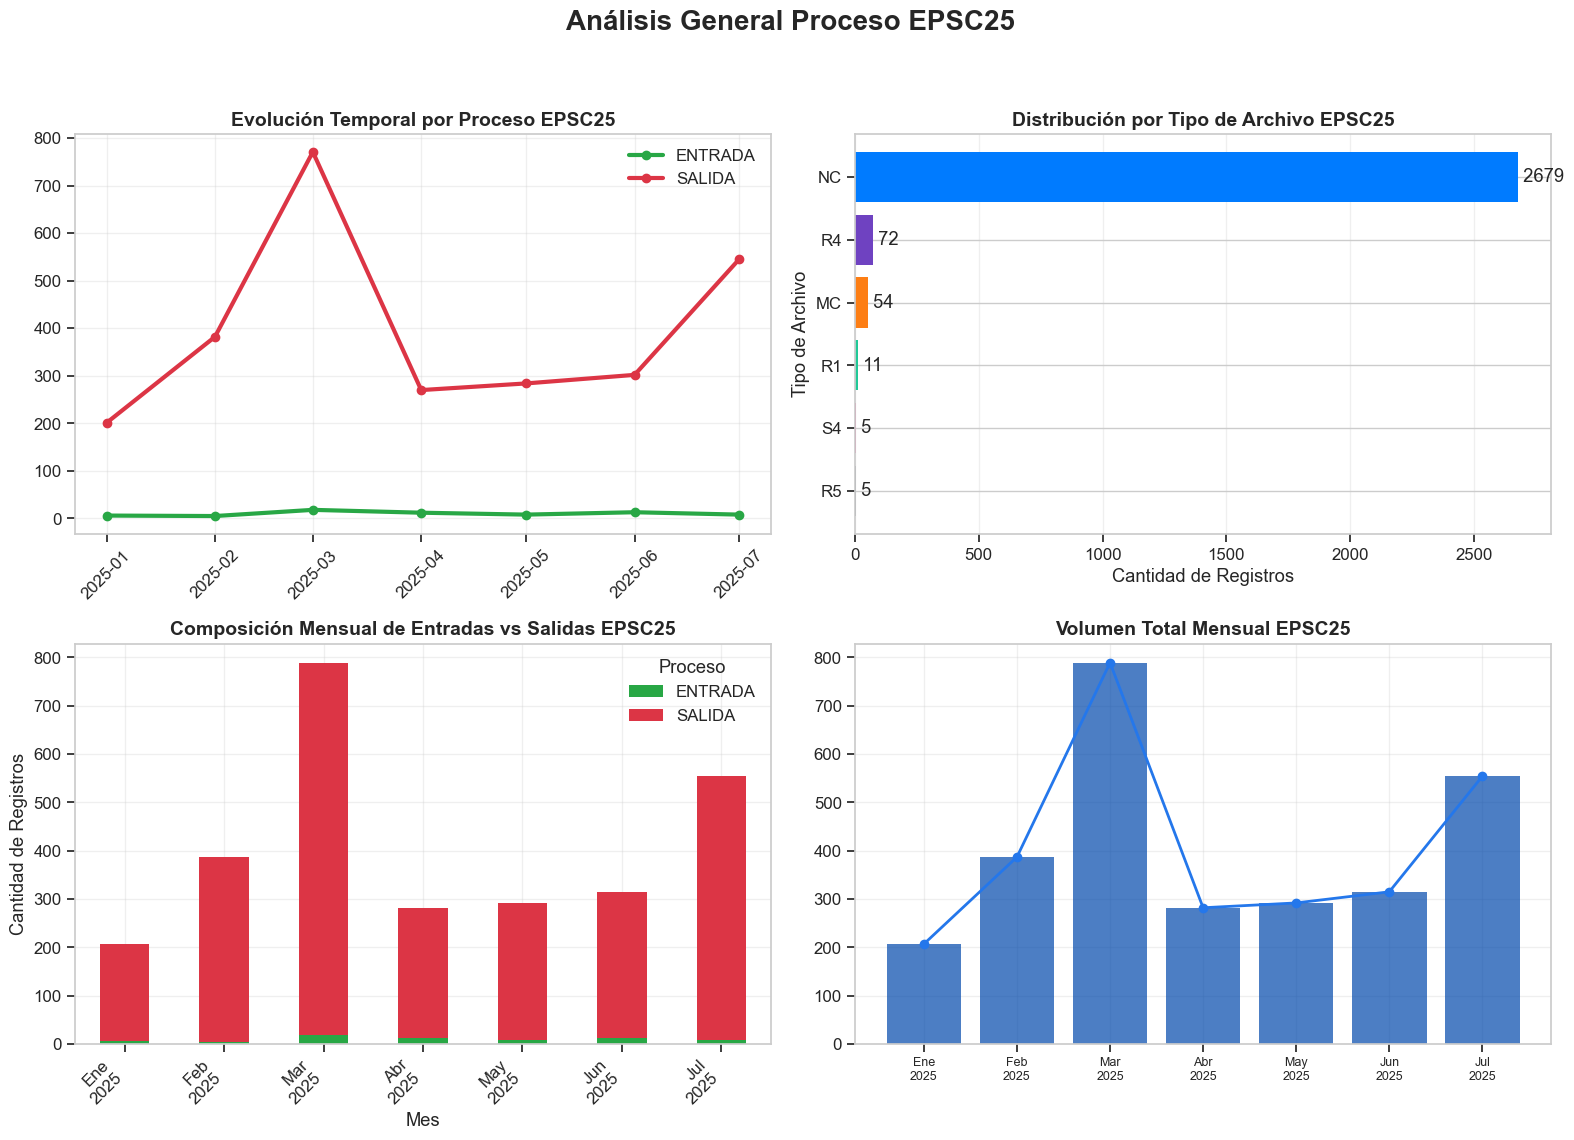

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
colores_archivos = {
    'NC': '#007bff',  # Azul pastel
    'MC': '#fd7e14',  # Naranja suave
    'R1': '#20c997',  # Turquesa
    'S4': '#e83e8c',  # Rosa
    'R4': '#6f42c1',  # Morado oscuro
    'R5': '#6c757d'   # Gris oscuro
}
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

# --- Inicio del Código del Dashboard ---

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
# Agrega el título general aquí
fig.suptitle(f'Análisis General Proceso {Regimen}', fontsize=20, fontweight='bold')
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Evolución temporal simplificada (solo totales por proceso)
timeline_simple = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
idx = timeline_simple.index.to_timestamp()

for proceso in timeline_simple.columns:
    color = colores_proceso.get(proceso, 'gray')
    ax1.plot(idx, timeline_simple.get(proceso, 0), marker='o', linewidth=3,
             label=proceso, color=color, markersize=6)

ax1.set_title(f'Evolución Temporal por Proceso {Regimen}', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Distribución por tipo de archivo (top 8)
top_tipos = df_Estadisticas['Tipo_Archivo'].value_counts().head(8)
colors = [colores_archivos.get(t, 'gray') for t in top_tipos.index]
ax2.barh(top_tipos.index, top_tipos.values, color=colors)

for index, value in enumerate(top_tipos.values):
    ax2.text(value, index, f' {value}', va='center')

ax2.set_title(f'Distribución por Tipo de Archivo {Regimen}', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de Registros')
ax2.set_ylabel('Tipo de Archivo')
ax2.grid(True, axis='x', alpha=0.3)
ax2.invert_yaxis()


# 3. Composición Mensual de Entradas vs Salidas
df_comp_proceso = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
df_comp_proceso.plot(kind='bar', ax=ax3, stacked=True, color=[colores_proceso.get(c, 'gray') for c in df_comp_proceso.columns])

ax3.set_title(f'Composición Mensual de Entradas vs Salidas {Regimen}', fontsize=14, fontweight='bold')
ax3.set_xlabel('Mes')
ax3.set_ylabel('Cantidad de Registros')
ax3.legend(title='Proceso')

labels = [f"{spanish_abbr.get(period.month, '')}\n{period.year}" for period in df_comp_proceso.index.to_timestamp()]
ax3.set_xticklabels(labels, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)


# 4. Tendencia general mensual
totales_mes = df_Estadisticas.groupby('Mes_Año').size()
idx = totales_mes.index.to_timestamp()
ax4.bar(range(len(idx)), totales_mes.values, color='#0047AB', alpha=0.7)
ax4.plot(range(len(idx)), totales_mes.values, color="#2477EB", linewidth=2, marker='o')
labels = [f"{spanish_abbr.get(period.month, '')}\n{period.year}" for period in totales_mes.index]
ax4.set_xticks(range(len(idx)))
ax4.set_xticklabels(labels, fontsize=9)
ax4.set_title(f'Volumen Total Mensual {Regimen}', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)


# Guardar la imagen
nombre_archivo = f"Análisis General Proceso {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

# Ajustar el layout para evitar solapamiento entre el título principal y los títulos de los subplots.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 8. Salida dataframe

## 8.1. Estandarización dataframe de salida

In [39]:
# Eliminar la columna 'RESPUESTA' si existe
if 'RESPUESTA' in df_Estadisticas.columns:
    df_Estadisticas = df_Estadisticas.drop(columns=['RESPUESTA'])

# Agregar las columnas 'ENT_ID_ORIGEN' y 'ENT_ID_RECEPTORA' vacías (tipo string)
df_Estadisticas['ENT_ID_ORIGEN'] = Regimen
df_Estadisticas['ENT_ID_RECEPTORA'] = Regimen
df_Estadisticas['Tipo_Reporte'] = "BDUA"
df_Estadisticas['Tipo_Regimen'] = Regimen
# Verificar el resultado
print("Columnas actuales:", list(df_Estadisticas.columns))

Columnas actuales: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'PROCESO', 'Tipo_Archivo', 'Mes_Año', 'ENT_ID_ORIGEN', 'ENT_ID_RECEPTORA', 'Tipo_Reporte', 'Tipo_Regimen']


In [40]:
df_Estadisticas.to_csv(R_Salida, index=False, encoding='ansi', sep=',')